# Data Challenge 2023 - 30
## Henry D. Saenz Valverde
## Lorenzo Gutierrez Vesga
## Jesus Cantillo López
### BioViz

datasets SE UNIRAN LOS DATASET 1 Y 2 PARA EL ANÁLISIS GENERAL

1. Monitoreos trianuales de fauna y flora en el Valle del Cerrejón, La Guajira mff1 - 80.359
2. Monitoreos trianuales de grupos hidrobiológicos en el Valle del Cerrejón, La Guajira mh2 - 30.994
3.  Caracterización de fauna terrestre y flora en el arroyo Bruno, municipio de Albania, La Guajira cff3 - 27.936
examinar las condiciones ambientales de l abiodiversidad del lugar
4. Monitoreos de los ecosistemas marinos de la bahía Portete, Puerto Bolívar, La Guajira mmb4 - 20634
5. Caracterización de grupos hidrobiológicos en el arroyo Bruno, municipio de Albania, La Guajira chb5 - 15.589
6. Capacidad de carga y compensación de fauna y flora en el Valle del Cerrejón, La Guajira ccff6 - 7653
7.  Monitoreos hidrobiológicos del Valle del Cerrejón en cuatro municipios del departamento de La Guajira mhv7 - 7423
8. Censo forestal asociado al nuevo cauce del arroyo Bruno, municipio de Albania, La Guajira cfb8 - 5586
9. Caracterización de fauna y flora de Puerto Bolívar, municipio de Uribia, La Guajira cffpb9 - 926

### 0. Paquetes

In [ ]:
!pip install statsmodels==0.14.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sklearn
# import networkx as nx
import scipy
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Carga y análisis de datos
Se unen los primeros dos dataset mff1 y mh2

In [6]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

In [7]:
mff1 = pd.read_csv('mff1.csv', names = headers,  sep='\t')
mh2 = pd.read_csv('mh2.csv', names = headers,  sep='\t')
#low_memory=False

Combinar los datasets en uno solo

In [8]:
datos = pd.merge(mff1, mh2, how='outer')
datos.head(5)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,3897965659,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6627,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED
2,3897965658,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6628,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.866Z,NaN,COORDINATE_ROUNDED
3,3897965657,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves_A.Palomino_Aves_2006:6629,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Walberto Naranjo;Wilmer Nunez,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED
4,3897965656,5fdcdc28-2a80-4236-a257-866b42ed250c,CERREJON:Aves-R.Rancheria_Aves_2009/2010:3132,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Carlos Villa de León;Marco Herrera Buelvas,NaN,NaN,2023-08-25T16:37:10.867Z,NaN,COORDINATE_ROUNDED


### Eliminar columnas innecesarias

In [9]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]
columnas_a_eliminar = ["gbifID", "datasetKey", "occurrenceID","depthAccuracy", "verbatimScientificNameAuthorship","mediaType", "issue", "establishmentMeans", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "lastInterpreted", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "basisOfRecord", "publishingOrgKey", "coordinateUncertaintyInMeters", "coordinatePrecision","elevationAccuracy", "elevationAccuracy"]

# Eliminar las columnas del DataFrame 'datos'
datos = datos.drop(columnas_a_eliminar, axis=1)

# Mostrar las primeras 5 filas del DataFrame resultante
print(datos.head())

    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ...  decimalLatitude  \
0                         scientificName  ...  decimalLatitude   
1  Busarellus nigricollis (Latham, 1790)  ..

# 2. Obtener y combinar la información climática
Ubicación geografica implementada
- Longitude: -72.6500
- Latitude: 11.1173

Entre Hatonuevo, Barrancas y Albania. Entre los dos tajos de las minas de explotación de cerrejón.

### Descripción de los datos
- ps = surface preassure
- T2M = temperature at 2 meters
- QV2M = Specific humidity
- WS50M = Wind speed at 50 meters
- PROTECTOTCORR = Precipitation corrected


In [10]:
bioclim_preasure = pd.read_excel('bioclim_preasure.xlsx')
bioclim_preasure.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PS,1981,96.84,96.72,96.78,96.71,96.67,96.79,96.81,96.72,96.72,96.64,96.65,96.68,96.73
1,PS,1982,96.89,96.79,96.75,96.73,96.62,96.74,96.78,96.73,96.65,96.65,96.59,96.71,96.72
2,PS,1983,96.62,96.62,96.62,96.57,96.55,96.68,96.74,96.84,96.76,96.70,96.74,96.85,96.69
3,PS,1984,96.84,96.64,96.75,96.70,96.71,96.73,96.77,96.75,96.68,96.70,96.71,96.78,96.73
4,PS,1985,96.95,96.84,96.74,96.70,96.68,96.83,96.87,96.81,96.69,96.65,96.72,96.91,96.78


In [11]:
bioclim_preasure.describe(include = 'all')

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
count,41,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.000000,96.853902,96.832439,96.789268,96.708049,96.688293,96.761220,96.807561,96.738780,96.679268,96.642439,96.660488,96.783902,96.745610
std,NaN,11.979149,0.076645,0.092811,0.073259,0.065277,0.059241,0.056444,0.050930,0.048228,0.042331,0.045154,0.048526,0.071235,0.027207
min,NaN,1981.000000,96.620000,96.600000,96.600000,96.570000,96.550000,96.590000,96.700000,96.670000,96.590000,96.550000,96.540000,96.600000,96.690000
25%,NaN,1991.000000,96.820000,96.790000,96.750000,96.670000,96.670000,96.730000,96.780000,96.700000,96.640000,96.610000,96.630000,96.740000,96.730000
50%,NaN,2001.000000,96.860000,96.840000,96.800000,96.700000,96.700000,96.770000,96.810000,96.730000,96.680000,96.640000,96.660000,96.790000,96.750000
75%,NaN,2011.000000,96.900000,96.900000,96.830000,96.750000,96.720000,96.800000,96.840000,96.750000,96.720000,96.670000,96.690000,96.840000,96.770000


In [12]:
bioclim_preasure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PARAMETER  41 non-null     object 
 1   YEAR       41 non-null     int64  
 2   JAN        41 non-null     float64
 3   FEB        41 non-null     float64
 4   MAR        41 non-null     float64
 5   APR        41 non-null     float64
 6   MAY        41 non-null     float64
 7   JUN        41 non-null     float64
 8   JUL        41 non-null     float64
 9   AUG        41 non-null     float64
 10  SEP        41 non-null     float64
 11  OCT        41 non-null     float64
 12  NOV        41 non-null     float64
 13  DEC        41 non-null     float64
 14  ANN        41 non-null     float64
dtypes: float64(13), int64(1), object(1)
memory usage: 4.9+ KB


Tomar las variables depth y elevation para el analiss por lo que se rellena los NaN con el promedio de la columna, es decir, se inputan datos

In [13]:
# Reemplazar valores NaN por 0 en las columnas 'depth' y 'elevation'
datos['depth'].fillna(0, inplace=True)
datos['elevation'].fillna(0, inplace=True)

# Convertir las columnas a tipo numérico
datos['depth'] = pd.to_numeric(datos['depth'], errors='coerce')
datos['elevation'] = pd.to_numeric(datos['elevation'], errors='coerce')

# Verificar el resultado
print(datos.head(5))


    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ...  decimalLatitude  \
0                         scientificName  ...  decimalLatitude   
1  Busarellus nigricollis (Latham, 1790)  ..

### Combinar variables bioclimaticas y generalizarlas

Se combinará el nuevo conjunto de datos de las variables bioclimáticas con el de los datos en general para agregar las variables bioclimáticas a los registros de especies

In [14]:
# Verificar si hay NaN en el DataFrame
print(datos.isnull().any())

kingdom                   False
phylum                     True
class                      True
order                      True
family                     True
genus                      True
species                    True
infraspecificEpithet       True
taxonRank                  True
scientificName             True
verbatimScientificName     True
countryCode                True
locality                   True
stateProvince              True
occurrenceStatus           True
individualCount            True
decimalLatitude            True
decimalLongitude           True
elevation                  True
depth                      True
eventDate                  True
day                        True
month                      True
year                       True
taxonKey                   True
speciesKey                 True
dtype: bool


In [15]:
print(datos['eventDate'].tail())

30079    2005-12-01T00:00:00
30080    2005-12-01T00:00:00
30081    2005-12-01T00:00:00
30082    2005-12-01T00:00:00
30083    2005-12-01T00:00:00
Name: eventDate, dtype: object


In [16]:
# Convertir la columna 'eventDate' a tipo datetime
datos['eventDate'] = pd.to_datetime(datos['eventDate'], errors='coerce')

# Extraer el año y el mes en enteros y eliminar decimales
datos['year'] = datos['eventDate'].dt.year.astype('Int64')
datos['month'] = datos['eventDate'].dt.month.astype('Int64')

print(datos[['eventDate', 'year', 'month']])

datos.head()

       eventDate  year  month
0            NaT  <NA>   <NA>
1     2006-01-01  2006      1
2     2006-01-01  2006      1
3     2006-01-01  2006      1
4     2009-01-01  2009      1
...          ...   ...    ...
30079 2005-12-01  2005     12
30080 2005-12-01  2005     12
30081 2005-12-01  2005     12
30082 2005-12-01  2005     12
30083 2005-12-01  2005     12

[30084 rows x 3 columns]


,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,...,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",...,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",...,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755


Se asignará valores numéricos a los meses del datset BIOCLIM

In [17]:
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_preasure = bioclim_preasure.rename(columns=meses)
bioclim_preasure.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,PS,1981,96.84,96.72,96.78,96.71,96.67,96.79,96.81,96.72,96.72,96.64,96.65,96.68,96.73
1,PS,1982,96.89,96.79,96.75,96.73,96.62,96.74,96.78,96.73,96.65,96.65,96.59,96.71,96.72
2,PS,1983,96.62,96.62,96.62,96.57,96.55,96.68,96.74,96.84,96.76,96.70,96.74,96.85,96.69
3,PS,1984,96.84,96.64,96.75,96.70,96.71,96.73,96.77,96.75,96.68,96.70,96.71,96.78,96.73
4,PS,1985,96.95,96.84,96.74,96.70,96.68,96.83,96.87,96.81,96.69,96.65,96.72,96.91,96.78


Importar los demás datos de bioclima

In [18]:
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_humedad = pd.read_excel('bioclim_humedad.xlsx')
bioclim_humedad = bioclim_humedad.rename(columns=meses)
bioclim_humedad.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,QV2M,1981,14.28,14.89,14.28,15.81,17.82,17.52,16.48,17.03,17.88,17.64,17.46,16.60,16.48
1,QV2M,1982,14.10,14.10,13.73,15.01,17.21,16.60,15.56,15.75,16.60,16.54,15.50,14.77,15.44
2,QV2M,1983,14.53,13.92,14.34,16.05,17.21,17.58,16.78,16.60,16.85,16.85,16.48,14.83,15.99
3,QV2M,1984,13.67,14.22,13.43,14.34,14.83,16.11,16.24,16.66,17.27,17.15,16.60,14.77,15.44
4,QV2M,1985,13.12,13.18,13.43,14.59,16.72,16.17,16.11,16.66,16.66,16.85,16.42,14.95,15.44


In [19]:
bioclim_prec = pd.read_excel("bioclim_prec.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_prec = bioclim_prec.rename(columns=meses)
bioclim_prec.head()


,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,PRECTOTCORR,1981,0.0,0.0,0.0,5.27,5.27,5.27,0.00,5.27,5.27,5.27,0.00,0.00,5.27
1,PRECTOTCORR,1982,0.0,0.0,0.0,5.27,5.27,0.00,0.00,0.00,5.27,0.00,0.00,0.00,0.00
2,PRECTOTCORR,1983,0.0,0.0,0.0,0.00,5.27,5.27,0.00,0.00,5.27,5.27,0.00,0.00,0.00
3,PRECTOTCORR,1984,0.0,0.0,0.0,0.00,0.00,0.00,5.27,5.27,5.27,5.27,5.27,0.00,0.00
4,PRECTOTCORR,1985,0.0,0.0,0.0,5.27,5.27,0.00,5.27,5.27,5.27,5.27,0.00,5.27,0.00


In [20]:
bioclim_temp = pd.read_excel("bioclim_temp.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_temp = bioclim_temp.rename(columns=meses)
bioclim_temp.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,T2M,1981,24.58,24.94,26.22,25.07,24.88,24.37,25.82,25.58,24.61,23.94,24.07,23.98,24.84
1,T2M,1982,23.96,24.51,24.96,25.16,25.37,25.98,26.12,27.06,26.00,24.82,25.64,25.00,25.38
2,T2M,1983,25.93,26.56,27.48,26.27,26.16,25.72,25.89,26.08,25.69,24.62,25.02,24.98,25.87
3,T2M,1984,24.62,25.48,25.78,26.74,26.55,26.41,24.90,25.30,24.05,23.85,23.44,23.07,25.01
4,T2M,1985,23.12,24.23,25.04,25.67,25.05,25.07,25.03,24.60,25.08,24.17,23.98,23.31,24.52


In [21]:
bioclim_wind = pd.read_excel("bioclim_wind.xlsx")
meses = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
bioclim_wind = bioclim_wind.rename(columns=meses)
bioclim_wind.head()

,PARAMETER,YEAR,1,2,3,4,5,6,7,8,9,10,11,12,ANN
0,WS50M,1981,2.77,3.55,3.20,3.47,2.22,2.61,2.73,2.41,1.98,1.81,2.31,2.72,2.64
1,WS50M,1982,3.20,3.41,3.73,3.32,2.31,2.89,3.27,3.03,2.04,2.27,2.56,3.09,2.92
2,WS50M,1983,2.80,2.66,2.88,2.96,2.57,2.34,2.76,2.47,2.38,2.06,2.40,2.99,2.61
3,WS50M,1984,2.95,3.16,3.28,3.11,3.20,2.68,2.65,2.66,1.88,2.05,2.22,3.45,2.77
4,WS50M,1985,3.03,3.60,3.59,3.23,2.57,2.80,2.81,2.56,2.30,2.29,2.47,3.23,2.87


### **Se combinó todas las variables bioclimaticas con el dataset "datos"**

In [22]:
datos['eventDate'] = pd.to_datetime(datos['eventDate'], errors='coerce')

# Extraer el año y el mes en enteros y eliminar decimales
datos['year'] = datos['eventDate'].dt.year.astype('Int64')
datos['month'] = datos['eventDate'].dt.month.astype('Int64')

# Crear el DataFrame 'merged_data' antes del bucle
merged_data = datos.copy()

additional_data_list = [bioclim_preasure, bioclim_temp, bioclim_humedad, bioclim_wind, bioclim_prec]
value_names = ["preasure", "temperature at 2 meters", "Specific humidity", "Wind speed at 50 meters", "Precipitation corrected"]

# Iterar sobre los conjuntos de datos adicionales y realizar el merge
for i, (additional_data, value_name) in enumerate(zip(additional_data_list, value_names), start=1):
    # Realizar la transformación del conjunto de datos adicional
    additional_data_transformed = additional_data.melt(id_vars=["YEAR"], var_name="MONTH", value_name=value_name)

    # Eliminar filas con NaN en las columnas "YEAR" y "MONTH"
    additional_data_transformed = additional_data_transformed.dropna(subset=["YEAR", "MONTH"])

    # Convertir las columnas a tipo entero, manejar valores no numéricos
    additional_data_transformed["YEAR"] = pd.to_numeric(additional_data_transformed["YEAR"], errors='coerce')
    additional_data_transformed["MONTH"] = pd.to_numeric(additional_data_transformed["MONTH"], errors='coerce')

    # Eliminar filas con NaN después de la conversión
    additional_data_transformed = additional_data_transformed.dropna(subset=["YEAR", "MONTH"])

    # Convertir las columnas a tipo entero
    additional_data_transformed["YEAR"] = additional_data_transformed["YEAR"].astype('Int64')
    additional_data_transformed["MONTH"] = additional_data_transformed["MONTH"].astype('Int64')

    # Realizar el "merge" basado en las columnas "year" y "month"
    merged_data = pd.merge(merged_data, additional_data_transformed, how="left", left_on=["year", "month"], right_on=["YEAR", "MONTH"])

print(merged_data.head())



    kingdom    phylum  class            order        family       genus  \
0   kingdom    phylum  class            order        family       genus   
1  Animalia  Chordata   Aves  Accipitriformes  Accipitridae  Busarellus   
2  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
3  Animalia  Chordata   Aves  Accipitriformes  Accipitridae       Buteo   
4  Animalia  Chordata   Aves    Passeriformes    Tyrannidae    Pitangus   

                  species  infraspecificEpithet  taxonRank  \
0                 species  infraspecificEpithet  taxonRank   
1  Busarellus nigricollis                   NaN    SPECIES   
2      Buteo albicaudatus                   NaN    SPECIES   
3       Buteo albonotatus                   NaN    SPECIES   
4    Pitangus sulphuratus                   NaN    SPECIES   

                          scientificName  ... temperature at 2 meters YEAR_x  \
0                         scientificName  ...                     NaN   <NA>   
1  Busarellus ni

<ipython-input-22-778ccde5fd36>:34: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'MONTH_x', 'YEAR_x'} in the result is deprecated and will raise a MergeError in a future version.



### **Eliminar las columnas no necesarias y renombrar las de condiciones ambientales**

In [28]:
# Eliminar múltiples columnas repetidas por nombre
# columnas_a_eliminar = ['YEAR_y', 'MONTH_y', 'YEAR_x', 'MONTH_x', 'preasure_x', 'temperature at 2 meters_x', 'Specific humidity_x', 'Wind speed at 50 meters_x', 'Precipitation corrected_x',
#                        'preasure_y', 'temperature at 2 meters_y', 'Specific humidity_y', 'Wind speed at 50 meters_y', 'Precipitation corrected_y',
#                        'YEAR', 'MONTH']
merged_data.drop('MONTH_y', axis=1, inplace=True)
data = merged_data.copy()
data.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


### Evaluación de datos faltantes
Observamos si hay falta de datos en las especies para poder organizar los datos que se implementarán en el modelo de regresión logístico para determinar la presencia u ausencia de las especies.

In [29]:
pd.set_option('display.max_columns', None) #Muestra todas las columnas del dataset
missing_data = data.isnull()
data.head(5)

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,NaN,NaN,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.0,0.0,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.0,0.0,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


In [30]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

#True: Missing Values
#False: Not missing values

"""
1) Hay 52154 ESPECIES no identificadas.
   Hay 59199 ESPECIES Identificadas
   Se concluye que se puede trabajar unicamemnte con el 53.16% de los datos

2) Hay 1527 ubicaciones de especies no reportadas.

3) Hay 111353 que poseen un reporte de presencia u ausencia

SI SALE ERROR EN ESTE BLOQUE DE CÓDIGO, EN EL ANTERIOR DEL ANTERIOR DE ESTE SE CAMBIAR 'MONTH_y' POR: 'MONTH_x' y ejecutar, luego cambiar
'MONTH_x' por 'YEAR_x' y ejecutar y finalmente cambiar 'YEAR_x' por 'YEAR_y' y ejecutar y luego ejecutar los siguientes bloques de código
"""

kingdom
False    30084
Name: kingdom, dtype: int64

phylum
False    30044
True        40
Name: phylum, dtype: int64

class
False    27676
True      2408
Name: class, dtype: int64

order
False    29147
True       937
Name: order, dtype: int64

family
False    29715
True       369
Name: family, dtype: int64

genus
False    26554
True      3530
Name: genus, dtype: int64

species
True     15962
False    14122
Name: species, dtype: int64

infraspecificEpithet
True     30064
False       20
Name: infraspecificEpithet, dtype: int64

taxonRank
False    30083
True         1
Name: taxonRank, dtype: int64

scientificName
False    30083
True         1
Name: scientificName, dtype: int64

verbatimScientificName
False    30083
True         1
Name: verbatimScientificName, dtype: int64

countryCode
False    30083
True         1
Name: countryCode, dtype: int64

locality
False    25468
True      4616
Name: locality, dtype: int64

stateProvince
False    30083
True         1
Name: stateProvince, dtype: int6

'\n1) Hay 52154 ESPECIES no identificadas.\n   Hay 59199 ESPECIES Identificadas\n   Se concluye que se puede trabajar unicamemnte con el 53.16% de los datos\n\n2) Hay 1527 ubicaciones de especies no reportadas.\n\n3) Hay 111353 que poseen un reporte de presencia u ausencia\n'

# 3. Visualizacion de los datos

Se observa graficamente los datos más relevantes  del conjunto de datos, así como la distribución de las variables en los mismos.

## Tratamiento de los datos

Prueba de chi cuadrado para revisar correlación entre variables categóricas para family, genus, kingdom, class, order, gender, species y determinar las de mayor correlacion que puedan ser implementadas en el modelo o decartadas

In [ ]:
variables = ["kingdom", "phylum", "class", "order", "family", "genus", "species"]

# Genera todas las combinaciones posibles de tres variables
combinaciones = list(combinations(variables, 3))

# Realiza las pruebas de chi-cuadrado para cada combinación
resultados = []
for combo in combinaciones:
    sub_data = data[list(combo)]
    contingency_table = pd.crosstab(sub_data[combo[0]], sub_data[combo[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    resultados.append((combo, chi2, p))

# Ordena los resultados por el valor p (menor valor p es más significativo)
resultados.sort(key=lambda x: x[2])

# Muestra las tres combinaciones con los valores p más bajos
for combo, chi2, p in resultados[:3]:
    print(f"Variables: {combo}, Chi-cuadrado: {chi2}, Valor p: {p}")


"""
TEST CHI-CUADRADO
H0: No hay asociación o dependencia significativa entre las dos variables categóricas.
H1: Hay asociación o dependencia significativa entre las dos variables categóricas.

Hay una alta asocioación entre Kingdom, phylum, class, order y family, por tanto implementarlas juntas en un modelo
no sería de enorme aporte.
"""

Variables: ('kingdom', 'phylum', 'class'), Chi-cuadrado: 555865.0, Valor p: 0.0
Variables: ('kingdom', 'phylum', 'order'), Chi-cuadrado: 555865.0, Valor p: 0.0
Variables: ('kingdom', 'phylum', 'family'), Chi-cuadrado: 555865.0, Valor p: 0.0


'\nTEST CHI-CUADRADO\nH0: No hay asociación o dependencia significativa entre las dos variables categóricas.\nH1: Hay asociación o dependencia significativa entre las dos variables categóricas.\n\nHay una alta asocioación entre Kingdom, phylum, class, order y family, por tanto implementarlas juntas en un modelo\nno sería de enorme aporte.\n'

## Visualización

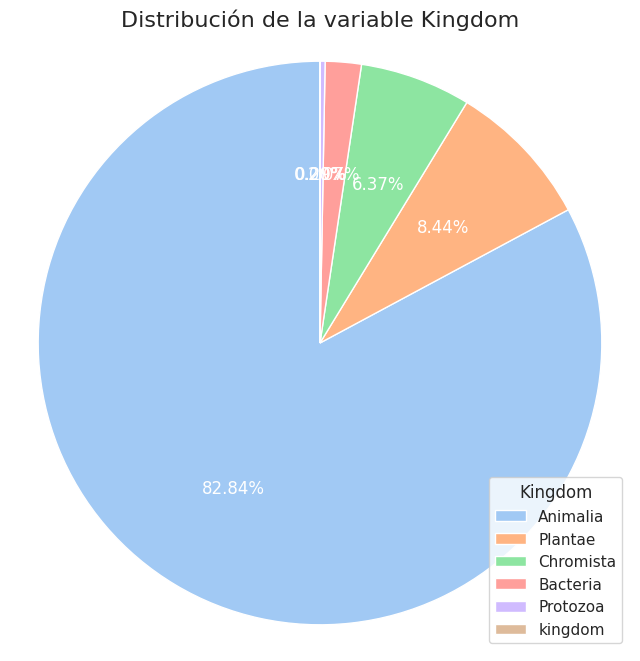

In [ ]:
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data['kingdom'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Gráfico de pie con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.2f%%',
                                  textprops=dict(color="w"), startangle=90)

# Añadir una leyenda en la parte inferior derecha
plt.legend(wedges, labels, title='Kingdom', bbox_to_anchor=(1, 0), loc="lower right")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Kingdom', fontsize=16)
plt.axis('equal')

plt.show()

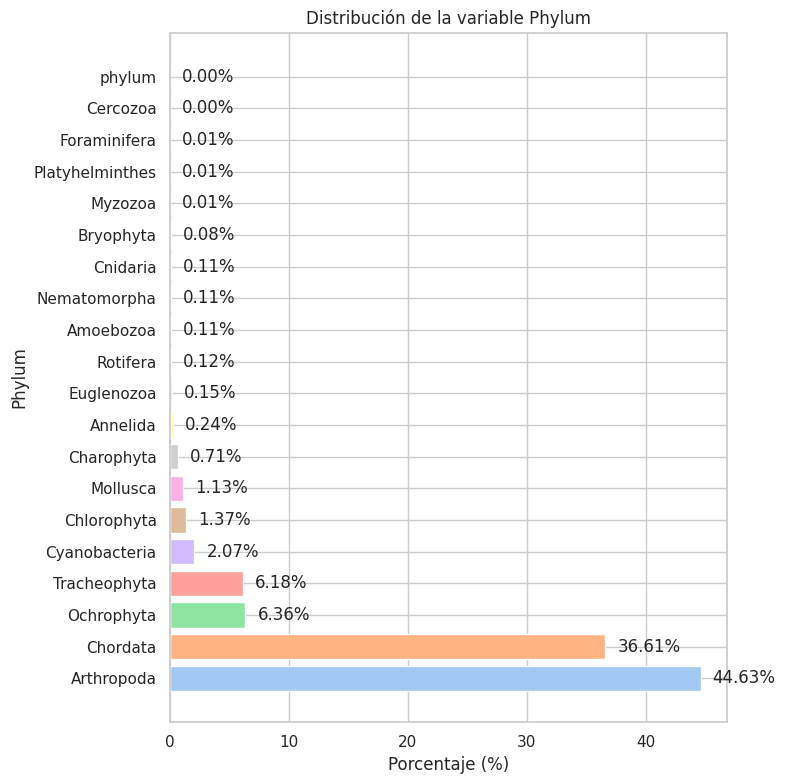

In [ ]:
# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data['phylum'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Calcular porcentajes
percentages = sizes / sizes.sum() * 100

# Gráfico de barras apiladas con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.barh(labels, percentages, color=sns.color_palette("pastel"), edgecolor='w')

# Añadir etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Phylum')
plt.title('Distribución de la variable Phylum')

# Mostrar porcentajes en las barras
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center')

# Ajustes adicionales
plt.tight_layout()
plt.show()

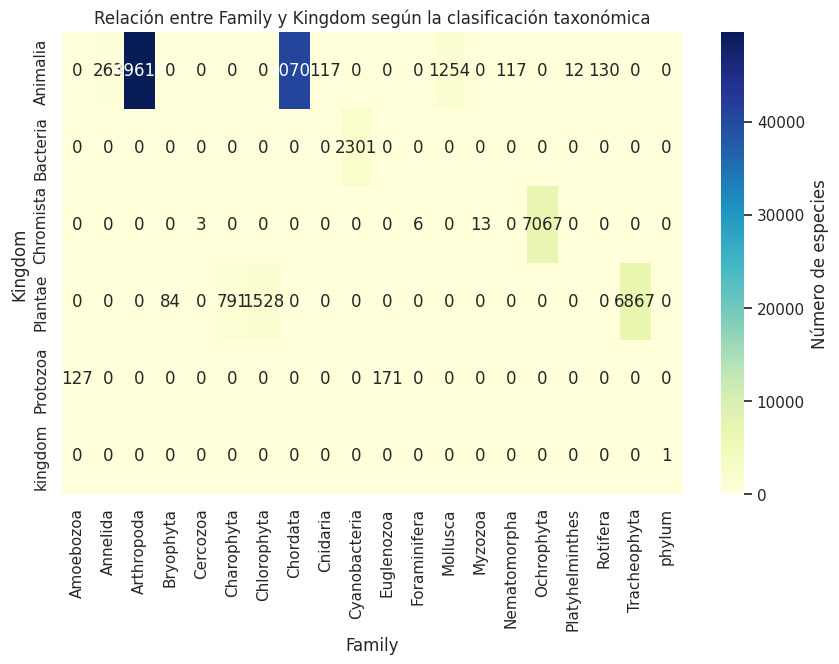

In [ ]:
heatmap_data = pd.crosstab(data['kingdom'], data['phylum'])

# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Crear un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Número de especies'})

# Añadir etiquetas y título
plt.xlabel('Family')
plt.ylabel('Kingdom')
plt.title('Relación entre Family y Kingdom según la clasificación taxonómica')

# Ajustes adicionales de diseño
plt.show()

# 4. Calcular el índice de riqueza de especies y más número de especies

Para ello primero debo hallar el numero de especies que son difernetes dentro del dataset

In [ ]:
import pandas as pd
import math

# Obtener especies únicas
especiesUnicas = data['species'].unique()
numeroUnicas = len(especiesUnicas)

# Información sobre especies únicas
print('Especies únicas:')
print(f'Total de especies únicas: {numeroUnicas}')
for especie in especiesUnicas:
    matching_rows = data[data['species'] == especie]
    if not matching_rows.empty:
        kingdom_correspondiente = matching_rows['kingdom'].iloc[0]
        print(f'{especie} - Kingdom: {kingdom_correspondiente}')
    else:
        print(f'{especie} - No se encontró una correspondencia en el DataFrame.')

Especies únicas:
Total de especies únicas: 1001
species - Kingdom: kingdom
Busarellus nigricollis - Kingdom: Animalia
Buteo albicaudatus - Kingdom: Animalia
Buteo albonotatus - Kingdom: Animalia
Pitangus sulphuratus - Kingdom: Animalia
Accipiter bicolor - Kingdom: Animalia
Buteo nitidus - Kingdom: Animalia
Pyrocephalus rubinus - Kingdom: Animalia
Rhynchocyclus olivaceus - Kingdom: Animalia
Todirostrum cinereum - Kingdom: Animalia
Tolmomyias sulphurescens - Kingdom: Animalia
Sublegatus arenarum - Kingdom: Animalia
Tyrannus dominicensis - Kingdom: Animalia
Dendrocygna autumnalis - Kingdom: Animalia
Inezia tenuirostris - Kingdom: Animalia
Machetornis rixosa - Kingdom: Animalia
Rostrhamus sociabilis - Kingdom: Animalia
Megarynchus pitangua - Kingdom: Animalia
Spizaetus ornatus - Kingdom: Animalia
Myiarchus crinitus - Kingdom: Animalia
Megaceryle alcyon - Kingdom: Animalia
Megaceryle torquata - Kingdom: Animalia
Myiarchus tyrannulus - Kingdom: Animalia
Chloroceryle amazona - Kingdom: Animal

In [ ]:
import pandas as pd
import math

# Calcula la proporción de individuos por especie (pi)
total_individuos = len(data)  # Reemplaza con el tamaño total de tu DataFrame

# Reemplaza los valores nulos en la columna 'species' con 0
data['species'] = data['species'].fillna(0)

In [ ]:
# Agrupa el DataFrame por la columna 'species' y cuenta las ocurrencias de cada especie
grupo_especies = data.groupby('species').size().reset_index(name='conteo')

# Calcula las proporciones
grupo_especies['proporcion'] = grupo_especies['conteo'] / total_individuos

# Calcula el índice de Shannon-Wiener
indice_shannon = -sum(pi * math.log(pi) for pi in grupo_especies['proporcion'] if pi > 0)

print(f'Índice de Biodiversidad de Shannon (H\'): {indice_shannon}')

Índice de Biodiversidad de Shannon (H'): 3.7899341003257043


## Especies con mayor ocurrencia

#### Top 5 mayores especies en general

In [ ]:
import numpy as np

# Excluir la especie '0' al contar las especies
filtered_data = data[data['species'] != '0']
top_species = filtered_data['species'].value_counts().head(6)

print("Top 5 de especies que más aparecen:")
print(top_species)

Top 5 de especies que más aparecen:
0                         52154
Canthidium euchalceum      3028
Canthon acutus             2134
Gonatodes vittatus         1302
Engystomops pustulosus     1114
Alouatta seniculus         1077
Name: species, dtype: int64


Top 3 especies por 'kingdom'

In [ ]:
filtered_data = data[data['species'] != '0']

# Obtener el top 3 de cada especie por la variable 'kingdom'
filtered_data = data[data['species'] != '0']

# Obtener el top 3 de las especies más repetidas para cada categoría de 'kingdom'
top_3_by_kingdom = (
    filtered_data.groupby('kingdom')['species']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(3)
    .reset_index(name='count')
)

print("Top 3 de las especies más repetidas para cada categoría de 'kingdom':")
print(top_3_by_kingdom)

Top 3 de las especies más repetidas para cada categoría de 'kingdom':
      kingdom                 species  count
0    Animalia                       0  39138
1    Animalia   Canthidium euchalceum   3028
2    Animalia          Canthon acutus   2134
3    Bacteria                       0   2197
4    Bacteria    Chroococcus turgidus    104
5   Chromista                       0   6860
6   Chromista            Synedra ulna    130
7   Chromista     Nitzschia sigmoidea     31
8     Plantae                       0   3748
9     Plantae  Achatocarpus nigricans    327
10    Plantae    Senegalia polyphylla    296
11   Protozoa                       0    211
12   Protozoa     Galeripora artocrea     20
13   Protozoa       Arcella discoides     13
14    kingdom                 species      1


## Especies de plantas coincidentes y su escala de riesgo
Se cmpara con una base de datos de la universidad nacional - observaciones botánicas. Los registros de plantas de la región si coinciden o no con los observados en los datos de cerrejon, para generar algun modelo de composicion ecosistemico y tomarlo como nueva variable para el modleo de regresión logístico.

Al haber únicamente 5 coincidencias de plantas, se concluye que no es viable la construccion del perfil ecosistemico a falta de información

In [ ]:
import pandas as pd
redlist = pd.read_csv("points_data.csv")

FileNotFoundError: ignored

In [ ]:
redlist.head(100)

In [ ]:
import pandas as pd
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]
mff1 = pd.read_csv('mff1.csv', names = headers,  sep='\t')
plantas = pd.read_excel("todasplantas.xlsx")

In [ ]:
mff1.head(5)

In [ ]:
plantas.head(5)

In [ ]:
especies_coincidentes_mff1 = mff1[mff1['species'].isin(plantas['Nombre'])]
especies_coincidentes_plantas = plantas[plantas['Nombre'].isin(mff1['species'])]

In [ ]:
especies_coincidentes_mff1.head()

In [ ]:
especies_coincidentes_plantas.head()

**Filtrar el nuevo dataset con las especies coincidentes**
En total hay  especies de plantas para las zonas de los datos obtenidos, las cuales pertenecen a la categoría endémica y vulnerable

In [ ]:
mff1_filtrado = mff1[mff1['species'].isin(especies_coincidentes_mff1['species'])]
mff1_filtrado.head()

In [ ]:
plantas_filtrado = plantas[plantas['Nombre'].isin(especies_coincidentes_plantas['Nombre'])]
plantas_filtrado.head()

# 5. Modelo de regresión logística
Se realizará el testeo de un modelo de regresión logística en el que se probará la presencia o ausencia de las especies en un territorio de acuerdo a ciertas condiciones ambnientales.

In [31]:
pip install pandas scikit-learn matplotlib

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Rellenar los datos faltantes de las variables *depth* y *elevation* con la media.

In [33]:
imputador = SimpleImputer(strategy='mean')
data['depth'] = imputador.fit_transform(data[['depth']])
data['elevation'] = imputador.fit_transform(data[['elevation']])
# data = data.drop('verbatimScientificNameAuthorship', axis =1)

data.head()

,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,elevation,depth,eventDate,day,month,year,taxonKey,speciesKey,preasure,temperature at 2 meters,Specific humidity,Wind speed at 50 meters,YEAR,MONTH,Precipitation corrected
0,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,countryCode,locality,stateProvince,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,117.990666,0.01069,NaT,day,<NA>,<NA>,taxonKey,speciesKey,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN
1,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Busarellus,Busarellus nigricollis,NaN,SPECIES,"Busarellus nigricollis (Latham, 1790)",Busarellus nigricollis,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.00000,2006-01-01,NaN,1,2006,2480692,2480692,96.82,24.47,14.77,3.26,2006,1,0.0
2,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albicaudatus,NaN,SPECIES,"Buteo albicaudatus Vieillot, 1816",Buteo albicaudatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.00000,2006-01-01,NaN,1,2006,2480519,2480519,96.82,24.47,14.77,3.26,2006,1,0.0
3,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,Buteo albonotatus,NaN,SPECIES,"Buteo albonotatus Kaup, 1847",Buteo albonotatus,CO,Arroyo Palomino,La Guajira,ABSENT,0,10.972583,-72.754556,138.000000,0.00000,2006-01-01,NaN,1,2006,2480541,2480541,96.82,24.47,14.77,3.26,2006,1,0.0
4,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Pitangus,Pitangus sulphuratus,NaN,SPECIES,"Pitangus sulphuratus (Linnaeus, 1766)",Pitangus sulphuratus,CO,"Río Ranchería, Sector La Calaguala",La Guajira,PRESENT,1,11.112,-72.634778,0.000000,0.00000,2009-01-01,NaN,1,2009,2482755,2482755,96.89,24.73,14.4,3.18,2009,1,0.0


### Conectar API de condiciones climaticas
Conectar a la API de worldclim para obtener un dataframe con las condiciones ambientales

In [34]:
# import pandas as pd
# import requests
# import time

# def obtener_datos_bioclimaticos(latitud, longitud):
#     url = f'https://worldclim.org/api/bioclim?lat={latitud}&lon={longitud}&decimal=3&format=json'
#     headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

#     try:
#         respuesta = requests.get(url, headers=headers)
#         respuesta.raise_for_status()
#         datos_bioclimaticos = respuesta.json()
#         df_bioclimatico = pd.DataFrame(datos_bioclimaticos.items(), columns=['Variable', 'Valor'])
#         return df_bioclimatico

#     except requests.exceptions.RequestException as e:
#         print(f"Error de solicitud: {e}")
#         return None
#     except Exception as e:
#         print(f"Error al obtener datos bioclimáticos: {e}")
#         return None

# # Crear un DataFrame para almacenar los resultados
# df_resultados_totales = pd.DataFrame(columns=['latitud', 'longitud', 'Variable', 'Valor'])

# # Iterar sobre los registros y obtener datos bioclimáticos
# for index, fila in mff1.iterrows():
#     latitud = fila['decimalLatitude']
#     longitud = fila['decimalLongitude']

#     # Obtener datos bioclimáticos para la latitud y longitud actual
#     df_resultado = obtener_datos_bioclimaticos(latitud, longitud)

#     # Agregar la información de latitud y longitud al DataFrame de resultados totales
#     if df_resultado is not None:
#         df_resultado['latitud'] = latitud
#         df_resultado['longitud'] = longitud
#         df_resultados_totales = pd.concat([df_resultados_totales, df_resultado], ignore_index=True)

#     # Agregar una pausa de 1 segundo entre solicitudes para evitar límites
#     time.sleep(1)

# # Mostrar el DataFrame con los resultados totales
# print(df_resultados_totales)



Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=decimalLatitude&lon=decimalLongitude&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=10.972583&lon=-72.754556&decimal=3&format=json
Error de solicitud: 403 Client Error: Forbidden for url: https://worldclim.org/api/bioclim?lat=10.972583&lon=-72.754556&decimal=3&format=json


KeyboardInterrupt: ignored

In [ ]:
# variables_climaticas = df_resultados_totales[['temp', 'prec', 'hum']]
# variables_geoespaciales = mff1[['latitud', 'longitud', 'elevacion', 'depth']]


## Lanzamiento del modelo de regresión logistica binaria

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Dicotomizar la variable objetivo
- 0: ABSENT
- 1: PRESENT

In [36]:
# Dicotomización de la variable objetivo
le = LabelEncoder()
data['occurrenceStatus'] = le.fit_transform(data['occurrenceStatus'])
print(data['occurrenceStatus'])

0        2
1        0
2        0
3        0
4        1
        ..
30079    0
30080    1
30081    0
30082    0
30083    0
Name: occurrenceStatus, Length: 30084, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copia del DataFrame para no modificar el original
data_encoded = data.copy()

# Codificar 'occurrenceStatus' en 0 y 1
label_encoder = LabelEncoder()
data_encoded['occurrenceStatus'] = label_encoder.fit_transform(data_encoded['occurrenceStatus'])

# Eliminar filas donde 'occurrenceStatus' no es 0 o 1
data_encoded = data_encoded[data_encoded['occurrenceStatus'].isin([0, 1])]

# Selecciona las variables predictoras
predictors = data_encoded[['depth', 'elevation', 'preasure', 'temperature at 2 meters', 'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected', 'kingdom', 'phylum']]

# Realiza one-hot encoding en las variables cualitativas
predictors = pd.get_dummies(predictors, columns=['kingdom', 'phylum'])

# Selecciona la variable objetivo
target = data_encoded['occurrenceStatus']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Crea el imputador
imputer = SimpleImputer(strategy='mean')

# Aplica la imputación a tus conjuntos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inicializa el modelo de regresión logística
model = LogisticRegression()

# Ajusta el modelo al conjunto de entrenamiento
model.fit(X_train_imputed, y_train)

# Predice en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Coeficientes del modelo
coeficientes = model.coef_[0]
nombres_variables = list(X_train.columns)
coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)
print("\nCoeficientes del modelo:")
print(coeficientes_df)



Precisión del modelo: 86.12%

Matriz de Confusión:
[[1633  593]
 [ 242 3549]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      2226
           1       0.86      0.94      0.89      3791

    accuracy                           0.86      6017
   macro avg       0.86      0.83      0.85      6017
weighted avg       0.86      0.86      0.86      6017


Coeficientes del modelo:
                   Variable  Coeficiente
3   temperature at 2 meters     2.803971
5   Wind speed at 50 meters     1.910894
4         Specific humidity     1.077428
14        phylum_Arthropoda     0.596597
7          kingdom_Animalia     0.452471
8          kingdom_Bacteria     0.151801
21     phylum_Cyanobacteria     0.151801
27        phylum_Ochrophyta     0.151033
19          phylum_Chordata     0.131672
24          phylum_Mollusca     0.115929
12         phylum_Amoebozoa     0.082890
9         kingdom_Chromista     0.076852
0        

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##### Grafica de correlación entre variables predictoras y la variable onjetivo

<ipython-input-38-c0b90483e28c>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



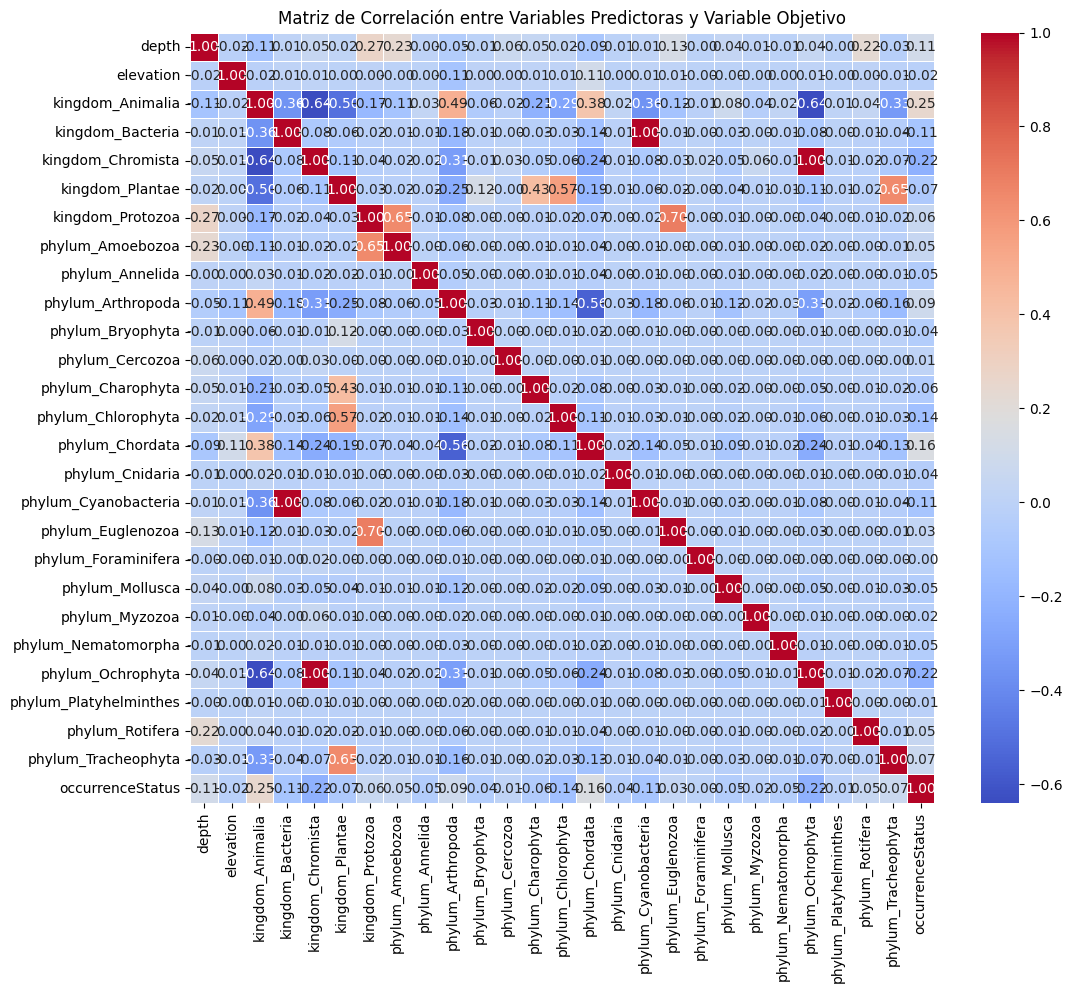

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar las variables predictoras y la variable objetivo en un solo DataFrame
data_for_correlation = pd.concat([predictors, target], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data_for_correlation.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Predictoras y Variable Objetivo')
plt.show()

##### Modelo logístico con statsmodels y P-valores

**MODELO LOGÍSTICO PARA OBTENER VARIABLES SIGNIFICATIVAS Y P-VALOR**

In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.impute import SimpleImputer
# import pandas as pd
# import statsmodels.api as sm

# # Copia del DataFrame para no modificar el original
# data_encoded = data.copy()

# # Codificar 'occurrenceStatus' en 0 y 1
# label_encoder = LabelEncoder()
# data_encoded['occurrenceStatus'] = label_encoder.fit_transform(data_encoded['occurrenceStatus'])

# # Eliminar filas donde 'occurrenceStatus' no es 0 o 1
# data_encoded = data_encoded[data_encoded['occurrenceStatus'].isin([0, 1])]

# # Selecciona las variables predictoras
# predictors = data_encoded[['depth', 'elevation', 'preasure', 'temperature at 2 meters', 'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected', 'kingdom', 'genus']]

# # Realiza one-hot encoding en las variables cualitativas
# predictors = pd.get_dummies(predictors, columns=['kingdom', 'genus'])

# # Selecciona la variable objetivo
# target = data_encoded['occurrenceStatus']

# # Divide los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# # Crea el imputador
# imputer = SimpleImputer(strategy='mean')

# # Aplica la imputación a tus conjuntos de entrenamiento y prueba
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# # Inicializa el modelo de regresión logística con statsmodels
# X_train_imputed = sm.add_constant(X_train_imputed)  # Agrega una columna de intercepto
# model = sm.Logit(y_train, X_train_imputed)
# result = model.fit()

# # Predice en el conjunto de prueba
# y_pred = result.predict(sm.add_constant(X_test_imputed)).round()

# # Calcula la precisión del modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# # Matriz de confusión
# print("\nMatriz de Confusión:")
# print(confusion_matrix(y_test, y_pred))

# # Informe de clasificación
# print("\nInforme de Clasificación:")
# print(classification_report(y_test, y_pred))

# # Coeficientes y p-values del modelo
# coeficientes_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': result.params, 'P-valor': result.pvalues})
# coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)
# print("\nCoeficientes del modelo:")
# print(coeficientes_df)


#### Significancia de variables

In [40]:
from sklearn.decomposition import PCA

# Calcula la matriz de correlación
correlation_matrix = np.corrcoef(X_train_imputed, rowvar=False)

# Elimina variables altamente correlacionadas
threshold = 0.80  # Ajusta según sea necesario
corr_var_pairs = np.where(np.abs(correlation_matrix) > threshold)
corr_vars = set()
for i, j in zip(*corr_var_pairs):
    if i != j and i not in corr_vars and j not in corr_vars:
        print(f'Variables {X_train.columns[i]} y {X_train.columns[j]} tienen una correlación alta: {correlation_matrix[i, j]:.2f}')
        corr_vars.add(j)

# Elimina las variables correlacionadas
X_train_imputed_filtered = X_train_imputed[:, list(set(range(X_train_imputed.shape[1])) - corr_vars)]


Variables preasure y Specific humidity tienen una correlación alta: -0.98
Variables preasure y Wind speed at 50 meters tienen una correlación alta: 0.96
Variables preasure y Precipitation corrected tienen una correlación alta: -0.95
Variables kingdom_Bacteria y phylum_Cyanobacteria tienen una correlación alta: 1.00
Variables kingdom_Chromista y phylum_Ochrophyta tienen una correlación alta: 1.00


**Matriz de confusión**

1. Verdaderos positivos (True Positives, TP): La cantidad de observaciones que el modelo clasifica correctamente como positivas (presencia).

2. Verdaderos negativos (True Negatives, TN): La cantidad de observaciones que el modelo clasifica correctamente como negativas (ausencia).

3. Falsos positivos (False Positives, FP): La cantidad de observaciones que el modelo clasifica incorrectamente como positivas cuando en realidad son negativas (falsas alarmas).

4. Falsos negativos (False Negatives, FN): La cantidad de observaciones que el modelo clasifica incorrectamente como negativas cuando en realidad son positivas (omisiones).


- Precisión (Accuracy): Mide la proporción de predicciones correctas en relación con el total de observaciones. Se calcula como (TP + TN) / (TP + TN + FP + FN).

- Sensibilidad (Recall o True Positive Rate): Mide la proporción de observaciones positivas que fueron correctamente clasificadas. Se calcula como TP / (TP + FN).

- Especificidad (Specificity o True Negative Rate): Mide la proporción de observaciones negativas que fueron correctamente clasificadas. Se calcula como TN / (TN + FP).

- Precisión (Precision o Positive Predictive Value): Mide la proporción de predicciones positivas que fueron correctas. Se calcula como TP / (TP + FP).

- F1-score: Es una medida del equilibrio entre precisión y sensibilidad. Se calcula como 2 * (Precision * Sensitivity) / (Precision + Sensitivity).


In [41]:
"""
                 |   Predicción Positiva    |   Predicción Negativa
---------------------------------------------------------------------
Real Positivo    |   Verdadero Positivo (TP)|   Falso Negativo (FN)
---------------------------------------------------------------------
Real Negativo    |   Falso Positivo (FP)    |   Verdadero Negativo (TN)

"""

'\n                 |   Predicción Positiva    |   Predicción Negativa\n---------------------------------------------------------------------\nReal Positivo    |   Verdadero Positivo (TP)|   Falso Negativo (FN)\n---------------------------------------------------------------------\nReal Negativo    |   Falso Positivo (FP)    |   Verdadero Negativo (TN)\n\n'

In [42]:
# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))



Matriz de Confusión:
[[1633  593]
 [ 242 3549]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      2226
           1       0.86      0.94      0.89      3791

    accuracy                           0.86      6017
   macro avg       0.86      0.83      0.85      6017
weighted avg       0.86      0.86      0.86      6017



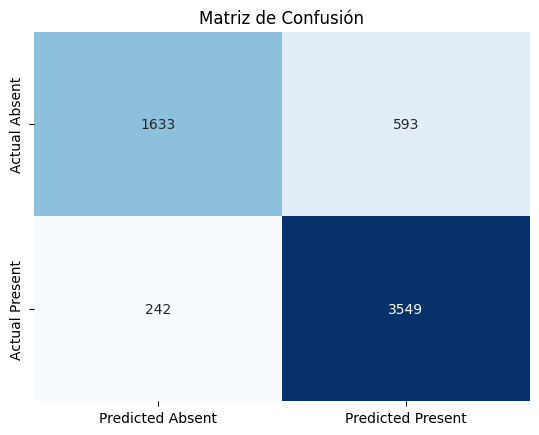

Sensibilidad (Recall): 0.94
Especificidad: 0.73
Precisión (Precision): 0.86
F1-score: 0.89


In [43]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Absent', 'Predicted Present'],
            yticklabels=['Actual Absent', 'Actual Present'])
plt.title('Matriz de Confusión')
plt.show()

# Obtener valores de la matriz de confusión
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

# Calcular Sensibilidad, Especificidad, Precisión y F1-score
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Imprimir los resultados
print(f'Sensibilidad (Recall): {sensitivity:.2f}')
print(f'Especificidad: {specificity:.2f}')
print(f'Precisión (Precision): {precision:.2f}')
print(f'F1-score: {f1_score:.2f}')

### Comprobación de supuestos

1. Independencia de errores
**Interpretación**: Este gráfico muestra la dispersión de los residuos en función de las predicciones. Los residuos deberían distribuirse aleatoriamente alrededor de cero para garantizar la independencia de los errores.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



<Axes: ylabel='occurrenceStatus'>

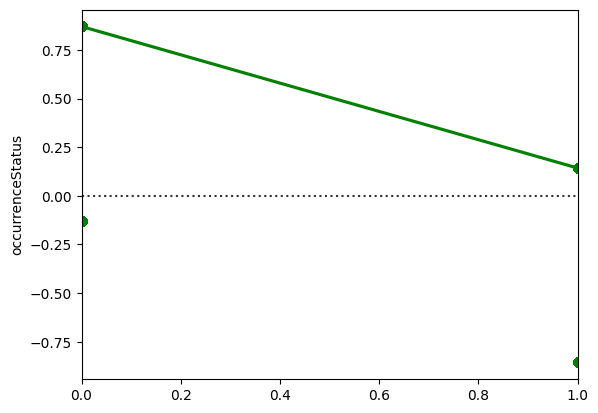

In [44]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")

2. Normalidad de los residuos

Este gráfico de probabilidad normal (Q-Q plot) compara la distribución de los residuos con una distribución normal teórica. Si los puntos se ajustan aproximadamente a la línea, se asume normalidad

((array([-3.68313508, -3.45066131, -3.32267531, ...,  3.32267531,
          3.45066131,  3.68313508]),
  array([-1, -1, -1, ...,  1,  1,  1])),
 (0.2603171881325935, -0.05833471829815522, 0.7071235049597452))

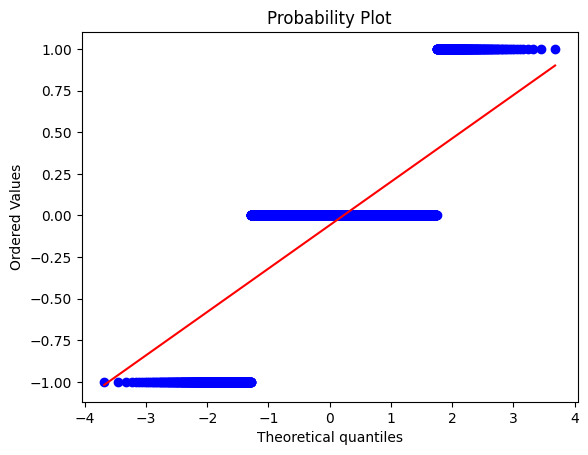

In [45]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)

3. Homocedasticidad de la varianza



<Axes: ylabel='occurrenceStatus'>

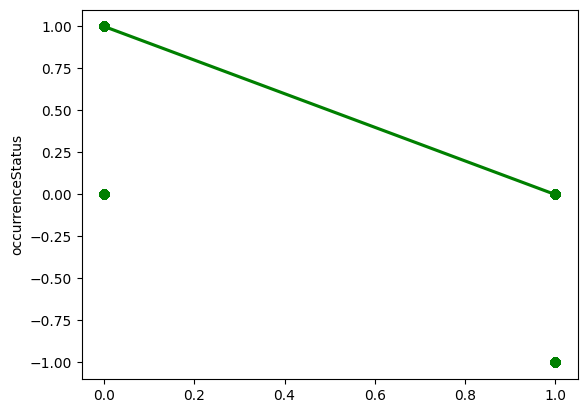

In [46]:
sns.regplot(x=y_pred, y=residuals, lowess=True, color="g")

**4. Curva de probabilidad**

Interpretación: Este gráfico verifica si la relación entre el logaritmo de las probabilidades y la variable predictora es lineal. Se espera que el gráfico sea aproximadamente lineal.

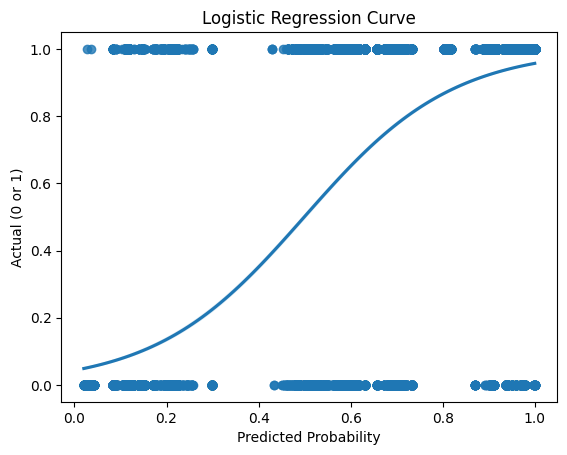

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted probabilities on the training set
y_pred_prob = model.predict_proba(X_train_imputed)[:, 1]

# Create a DataFrame with predicted probabilities and the actual target values
logistic_data = pd.DataFrame({'Predicted Probability': y_pred_prob, 'Actual': y_train})

# Plot the logistic regression curve
sns.regplot(x='Predicted Probability', y='Actual', data=logistic_data, logistic=True)
plt.title('Logistic Regression Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual (0 or 1)')
plt.show()

5. verificar multicolinealidad

**Interpretación**: Consiste en la existencia de relaciones lineales entre dos o más variables independientes del modelo lineal uniecuacional multiple. Es decir, es una condición que ocurre cuando algunas variables predictoras incluidas en el modelo están correlacionadas con otras variables predictoras.

In [48]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X_train_imputed to a DataFrame
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Calculate the VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_df = calculate_vif(X_train_imputed_df)
print(vif_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in double_scalars



                   Variable           VIF
0                     depth  2.283912e+00
1                 elevation  1.046793e+00
2                  preasure  3.770875e+01
3   temperature at 2 meters  2.780219e+00
4         Specific humidity  5.161064e+01
5   Wind speed at 50 meters  4.115279e+01
6   Precipitation corrected  2.005899e+01
7          kingdom_Animalia  1.585860e+07
8          kingdom_Bacteria           inf
9         kingdom_Chromista           inf
10          kingdom_Plantae  1.624595e+06
11         kingdom_Protozoa  2.196650e+05
12         phylum_Amoebozoa  5.750848e+00
13          phylum_Annelida  1.148496e+01
14        phylum_Arthropoda  7.316180e+02
15         phylum_Bryophyta  5.670662e+00
16          phylum_Cercozoa           inf
17        phylum_Charophyta  6.100478e+01
18       phylum_Chlorophyta  1.054616e+02
19          phylum_Chordata  6.382919e+02
20          phylum_Cnidaria  5.379331e+00
21     phylum_Cyanobacteria           inf
22        phylum_Euglenozoa  6.561

Curva *ROC* del modelo

Muestra la tasa de verdaderos positivos (TPR), también conocida como potencia, en el eje Y, y la tasa de falsos positivos (FPR), también conocida como error de tipo 1, en el eje X

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



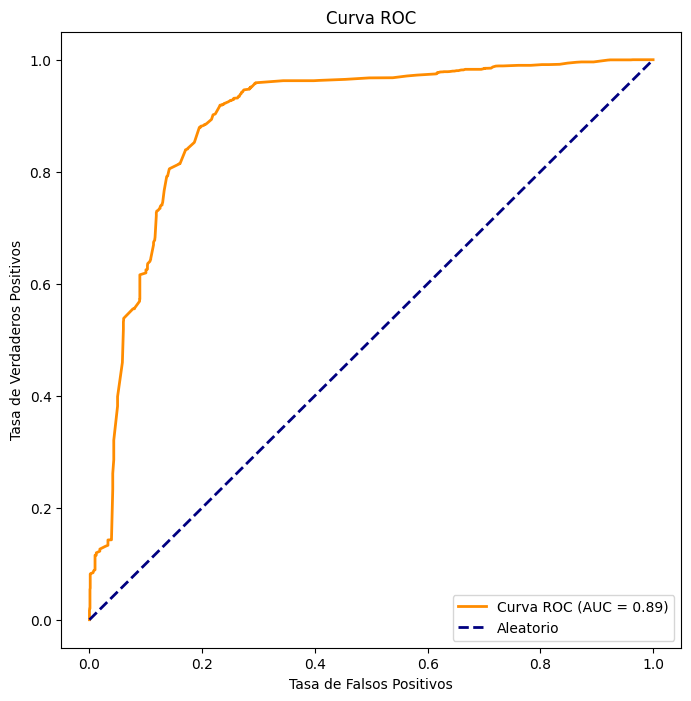

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtén las probabilidades predichas en lugar de las etiquetas predichas
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Curva de *Precision recall*

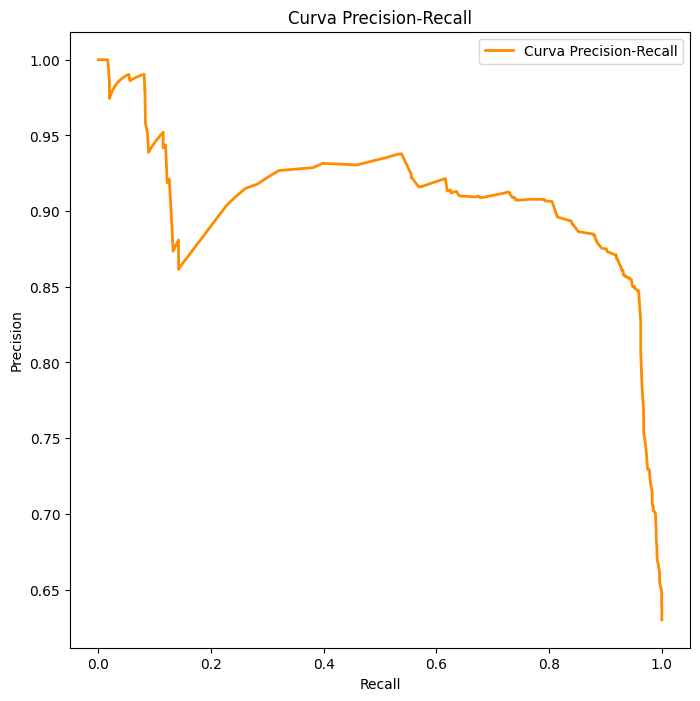

In [50]:
from sklearn.metrics import precision_recall_curve

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Trazar la curva Precision-Recall
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='upper right')
plt.show()

### Conclusión del modelo de regresión logística binaria

Con un accuracy de 85.12 % las predicciones que realiza el modelo para determinar la presencia u ausencia de una especie en el territorio circundante a las coordenadas longitude: -72.6500 y Latitude: 11.1173, bajo los predictores bioclimaticos elevation,depth, temperature at 2 meters, preasure, wind speed at 50 meters, specific humidity, kingdom y phylum son correctas.

# 6. Modelo de distribución de especies

Se desplegó un modelo de distribución de especies en el que se muestra mediante un mapa HTML de Colombia las observaciones de cada especie y la probabilidad de presencia de determinadas especies en las coordenadas circundantes a las observaciones mineras de cerrejón, con el objetivo de identificar graficamente las zonas en las cuales se deben tomar mayores acciones directas de conservacion para la permanencia de las especies.

In [ ]:
pip install scikit-learn geopandas

ERROR: Operation cancelled by user


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from io import BytesIO
import requests
import zipfile

Importar URL para geografía de Colombia

In [ ]:
# Descargar límites de los países en formato GeoJSON
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
response = requests.get(url)

# Cargar el GeoDataFrame de límites de los países
world = gpd.read_file(BytesIO(response.content))

# Filtrar solo los límites de Colombia
colombia = world[world['ADMIN'] == 'Colombia']

<ipython-input-118-e6b4033dd767>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['kingdom'] = data_selected['kingdom'].astype(str)
<ipython-input-118-e6b4033dd767>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['phylum'] = data_selected['phylum'].astype(str)
<ipython-input-118-e6b4033dd767>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Precisión del modelo: 79.51%

Matriz de Confusión:
[[ 351 2095]
 [ 267 8816]]

Informe de Clasificación:
              precision    recall  f1-score   support

      ABSENT       0.57      0.14      0.23      2446
     PRESENT       0.81      0.97      0.88      9083

    accuracy                           0.80     11529
   macro avg       0.69      0.56      0.56     11529
weighted avg       0.76      0.80      0.74     11529


Coeficientes del modelo:
                  Variable  Coeficiente
4        Specific humidity     1.671874
5  Wind speed at 50 meters     1.209389
3  temperature at 2 meters     0.949508
7                  kingdom     0.230723
0                    depth     0.003697
1                elevation    -0.000635
8                   phylum    -0.120826
2                 preasure    -0.521235
6  Precipitation corrected    -0.545223


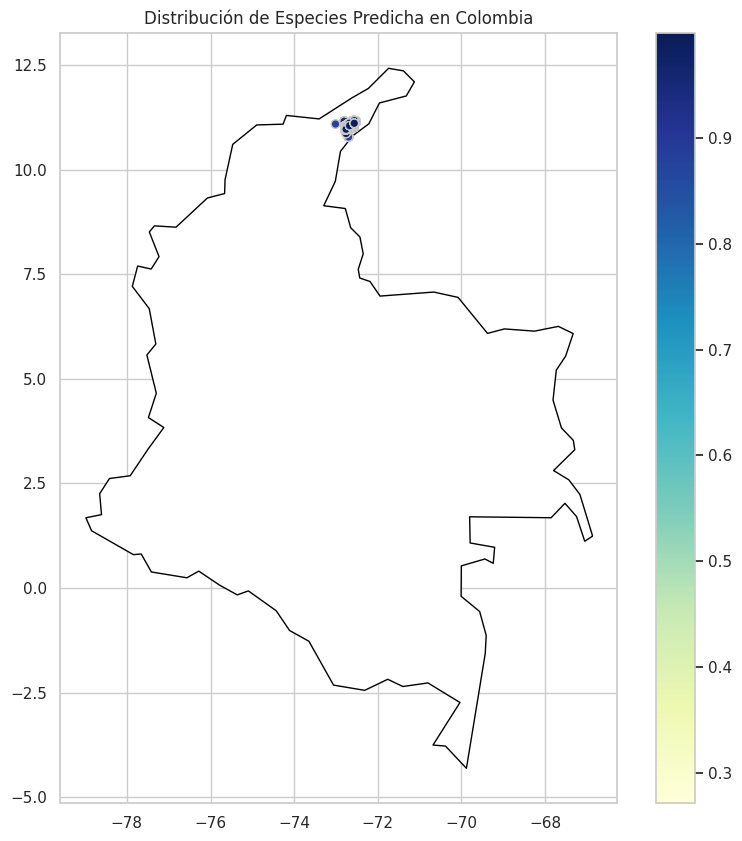

In [ ]:
# Seleccionar las variables relevantes del DataFrame original
selected_variables = ['kingdom', 'phylum', 'species', 'month', 'year',
                       'decimalLatitude', 'decimalLongitude', 'occurrenceStatus',
                       'depth', 'elevation', 'preasure', 'temperature at 2 meters',
                       'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected']

# Filtrar las columnas relevantes del DataFrame original
data_selected = data[selected_variables].copy()

# Reemplazar '0' con NaN en la columna 'species'
data_selected['species'] = data_selected['species'].replace('0', np.nan)

# Eliminar filas con valores faltantes
data_selected = data_selected.dropna()

# Convertir las columnas 'kingdom' y 'phylum' a tipo str antes de codificar
data_selected['kingdom'] = data_selected['kingdom'].astype(str)
data_selected['phylum'] = data_selected['phylum'].astype(str)

# Codificar variables categóricas
label_encoder_kingdom = LabelEncoder()
data_selected.loc[:, 'kingdom'] = label_encoder_kingdom.fit_transform(data_selected['kingdom'])

label_encoder_phylum = LabelEncoder()
data_selected.loc[:, 'phylum'] = label_encoder_phylum.fit_transform(data_selected['phylum'])

# Crear GeoDataFrame con las variables seleccionadas y la geometría basada en latitud y longitud
gdf = gpd.GeoDataFrame(data_selected,
                       geometry=gpd.points_from_xy(data_selected['decimalLongitude'], data_selected['decimalLatitude']))

# Variables predictoras
predictors = gdf[['depth', 'elevation', 'preasure', 'temperature at 2 meters',
                  'Specific humidity', 'Wind speed at 50 meters', 'Precipitation corrected',
                  'kingdom', 'phylum']]

# Variable objetivo
target = data_selected['occurrenceStatus']  # Cambia esto a la variable de tu interés

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Inicializar y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Coeficientes del modelo
coeficientes = model.coef_[0]
nombres_variables = list(X_train.columns)
coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)
print("\nCoeficientes del modelo:")
print(coeficientes_df)

# Visualizar la distribución de especies en un mapa de Colombia
fig, ax = plt.subplots(figsize=(10, 10))

# Plotea los límites de Colombia
colombia.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Plotea el GeoDataFrame con colores basados en las probabilidades predichas
gdf['predicted_probability'] = model.predict_proba(imputer.transform(predictors))[:, 1]
gdf.plot(column='predicted_probability', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Distribución de Especies Predicha en Colombia')

plt.show()

In [ ]:
pip install folium

#### Muestra la probabilidad de aparición de cada especie en el territorio circundante de la guajira

Se muestra un mapa del territorio geográfico colombiano en donde se señala mediante un punto las apariciones de especies mediante observaciones de los conjuntos de datos mff1 y mh2 para ver que probabilidad de distribución y aparición posen en territorios circundantes con base a variables predictoras anteriores.

In [ ]:
import folium
from folium.plugins import MarkerCluster
import requests
from io import BytesIO
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Crear un mapa centrado en Colombia
colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Agregar un grupo de marcadores al mapa
marker_cluster = MarkerCluster().add_to(colombia_map)

# Iterar sobre las filas del GeoDataFrame y agregar un marcador por cada punto
for index, row in gdf.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=f"Especie: {row['species']}<br>Prob. Aparición: {row['predicted_probability']:.2f}",
    ).add_to(marker_cluster)

# Mostrar el mapa
colombia_map.save("mapa_especies_predicho_colombia.html")

KeyboardInterrupt: ignored

Mapa de apariciones y probabilida d eespecies numerado

In [ ]:
# # Crear un mapa centrado en Colombia
# colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# # Agregar un grupo de marcadores al mapa
# marker_cluster = MarkerCluster().add_to(colombia_map)

# # Iterar sobre las filas del GeoDataFrame y agregar un marcador por cada punto
# for index, row in gdf.iterrows():
#     folium.Marker(
#         location=[row['decimalLatitude'], row['decimalLongitude']],
#         popup=f"Prob. Aparición: {row['predicted_probability']:.2f}",
#     ).add_to(marker_cluster)

# # Mostrar el mapa
# colombia_map.save("mapa_especies_numeradas_predicho_colombia.html")


# 7. Condiciones climaticas futuras y distribución de probabilidad futura

Se desea elaborar un nuevo modelo de regresión logística binaria para determinar la probabilidad de presencia y ausencia de las mismas especies en el territorio partiendo de condiciones bioclimaticas futuras, de tal foema, cerrejón identifique ¿Qué acciones puntuales de compensación debe tomar para preservar las especies?

No tner en cuenta esta sección, ya que no se logró encontrar conjuntos de datos ni bases de datos sobre condiciones futuras del clima.

In [ ]:
imputador = SimpleImputer(strategy='mean')
data['Wind speed at 50 meters'] = imputador.fit_transform(data[['Wind speed at 50 meters']])
data['Specific humidity'] = imputador.fit_transform(data[['Specific humidity']])
data['preasure'] = imputador.fit_transform(data[['preasure']])

# data = data.drop('verbatimScientificNameAuthorship', axis =1)

In [ ]:
# data = data.iloc[:-1]
print(len(data['year']))
print(len(data))

4
4


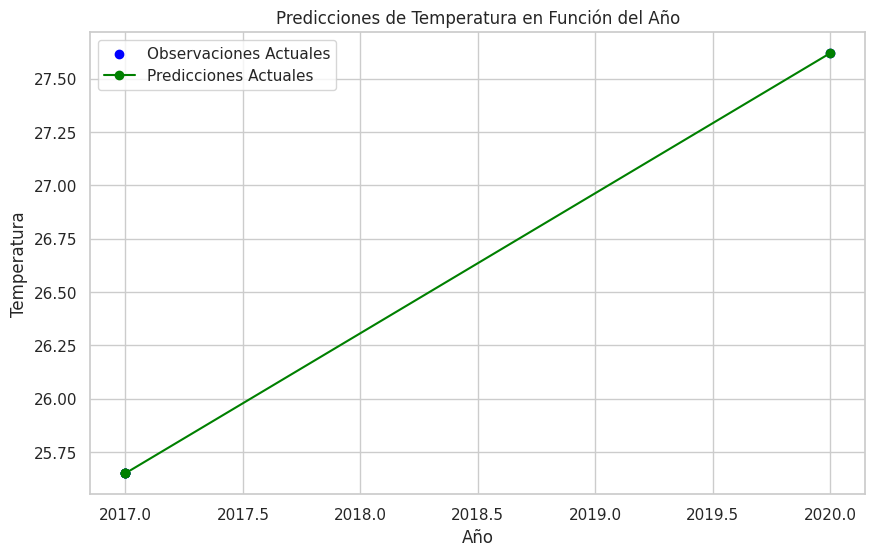

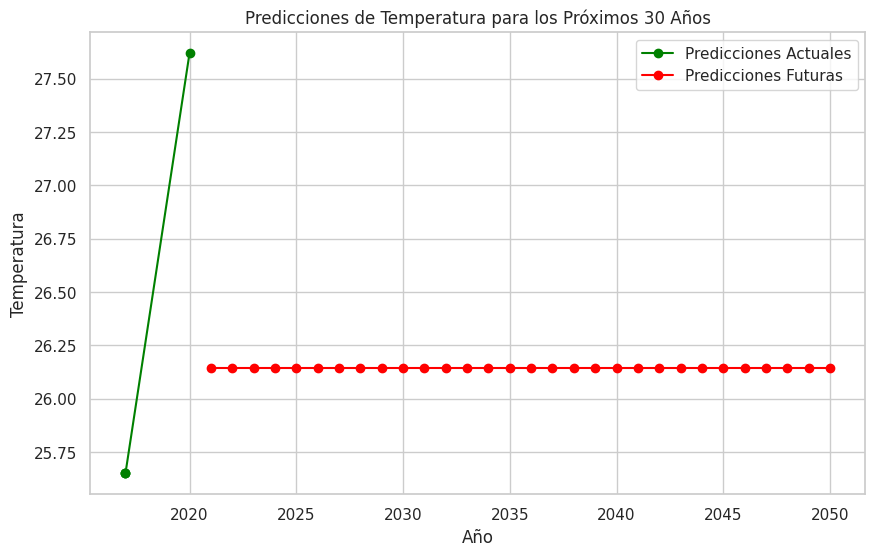

In [ ]:
# Elimina las filas con valores faltantes en la variable objetivo
data = data.dropna(subset=['temperature at 2 meters'])

# Selecciona las variables predictoras
predictors = data[['depth', 'elevation', 'preasure', 'Specific humidity', 'Wind speed at 50 meters']]

# Selecciona la variable objetivo
target = data['temperature at 2 meters']

# Verificar y tratar NaN en predictors y target
nan_rows = data.isnull().any(axis=1)
data = data[~nan_rows]

# Inicializa el modelo de regresión lineal
model = LinearRegression()

# Ajusta el modelo a tus datos
model.fit(predictors, target)

# Visualiza las predicciones actuales
predictions = model.predict(predictors)

# Visualiza las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], target, label='Observaciones Actuales', color='blue')
plt.plot(data['year'], predictions, label='Predicciones Actuales', color='green', marker='o')
plt.title('Predicciones de Temperatura en Función del Año')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

# Ahora, vamos a hacer predicciones para los próximos 30 años
# Supongamos que tienes un DataFrame 'future_data' con los años futuros
future_years = np.arange(data['year'].max() + 1, data['year'].max() + 31)
future_data = pd.DataFrame({'depth': data['depth'].mean(),
                             'elevation': data['elevation'].mean(),
                             'preasure': data['preasure'].mean(),
                             'Specific humidity': data['Specific humidity'].mean(),
                             'Wind speed at 50 meters': data['Wind speed at 50 meters'].mean()},
                            index=future_years)

# Hace predicciones para los próximos 30 años
future_predictions = model.predict(future_data)

# Visualiza las predicciones para los próximos 30 años
plt.figure(figsize=(10, 6))
plt.plot(data['year'], predictions, label='Predicciones Actuales', color='green', marker='o')
plt.plot(future_data.index, future_predictions, label='Predicciones Futuras', color='red', marker='o')
plt.title('Predicciones de Temperatura para los Próximos 30 Años')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

No tomar en cuenta las predicciones por falta de datos certeros del futuro

# 8. Pruebas de hipótesis y datos relevantes de los conjuntos de datos de cerrejón

1. Analizaremos la proporción de reinos entre los dataset de caracterización de flora, fauna y grupos hidrobiológicos del arroyo bruno vs censo forestal asociado al nuevo cause del arroyo bruno con el objetivo de identificar si hubo un empacto ambiental a corto plazo de la presencia previa de especies cercanas al arroyo vs las acciones de cerrejón

In [ ]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

In [ ]:
import pandas as pd
cff3 = pd.read_csv('cff3.csv', names = headers, sep ='\t')
chb5 = pd.read_csv('chb5.csv', names = headers, sep = '\t')

<ipython-input-22-9be5b08d04a5>:2: DtypeWarning: Columns (0,19,21,22,23,24,25,26,27,28,30,31,32,33,34,37,38,40,41,43,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  cff3 = pd.read_csv('cff3.csv', names = headers, sep ='\t')


In [ ]:
cff3.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,3909437303,d0a95d44-3622-4c40-bbaf-79a5968c697d,Cerrejon:2021-09_herpetos:2648,Animalia,Chordata,Amphibia,Anura,Hylidae,Dendropsophus,Dendropsophus microcephalus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Victor Hugo Capera Moreno,NaN,NaN,2023-08-26T11:17:59.606Z,NaN,NaN
2,3909437302,d0a95d44-3622-4c40-bbaf-79a5968c697d,Cerrejon:2021-09_herpetos:2649,Animalia,Chordata,Amphibia,Anura,Hylidae,Dendropsophus,Dendropsophus microcephalus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Victor Hugo Capera Moreno,NaN,NaN,2023-08-26T11:17:59.606Z,NaN,NaN
3,3909437301,d0a95d44-3622-4c40-bbaf-79a5968c697d,Cerrejon:2021-09_herpetos:2646,Animalia,Chordata,Amphibia,Anura,Hylidae,Dendropsophus,Dendropsophus microcephalus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Victor Hugo Capera Moreno,NaN,NaN,2023-08-26T11:17:59.606Z,NaN,NaN
4,3909437300,d0a95d44-3622-4c40-bbaf-79a5968c697d,Cerrejon:2021-09_herpetos:2647,Animalia,Chordata,Amphibia,Anura,Hylidae,Dendropsophus,Dendropsophus microcephalus,...,NaN,NaN,CC_BY_NC_4_0,NaN,Victor Hugo Capera Moreno,NaN,NaN,2023-08-26T11:17:59.607Z,NaN,NaN


In [ ]:
cff3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27937 entries, 0 to 27936
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   gbifID                            27937 non-null  object
 1   datasetKey                        27937 non-null  object
 2   occurrenceID                      27937 non-null  object
 3   kingdom                           27937 non-null  object
 4   phylum                            27886 non-null  object
 5   class                             27875 non-null  object
 6   order                             18399 non-null  object
 7   family                            27875 non-null  object
 8   genus                             27789 non-null  object
 9   species                           26656 non-null  object
 10  infraspecificEpithet              26 non-null     object
 11  taxonRank                         27937 non-null  object
 12  scientificName    

In [ ]:
cff3.describe()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
count,27937,27937,27937,27937,27886,27875,18399,27875,27789,26656,...,443,1,27937,1,27937,1,1,27937,1,720
unique,27937,2,27937,3,4,10,54,143,498,674,...,3,1,2,1,12,1,1,4888,1,5
top,gbifID,d0a95d44-3622-4c40-bbaf-79a5968c697d,occurrenceID,Animalia,Chordata,Squamata,Passeriformes,Sphaerodactylidae,Gonatodes,Gonatodes vittatus,...,"Durán-Prieto, Camila",dateIdentified,CC_BY_NC_4_0,rightsHolder,Victor Hugo Capera Moreno,typeStatus,establishmentMeans,2023-08-26T11:17:59.887Z,mediaType,COORDINATE_ROUNDED
freq,1,27936,1,26140,19609,9375,4126,4118,3600,3134,...,309,1,27936,1,11424,1,1,16,1,406


In [ ]:
chb5.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,3909431937,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,CERREJON-BRUNO:Hidrobiologia:0438,Animalia,Chordata,NaN,Characiformes,Curimatidae,Cyphocharax,Cyphocharax magdalenae,...,NaN,NaN,CC_BY_NC_4_0,NaN,Mario Javier Olaciregui,NaN,NaN,2023-08-26T11:21:54.021Z,NaN,NaN
2,3909431936,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,CERREJON-BRUNO:Hidrobiologia:0439,Animalia,Chordata,NaN,Perciformes,Cichlidae,Caquetaia,Caquetaia kraussii,...,NaN,NaN,CC_BY_NC_4_0,NaN,Mario Javier Olaciregui,NaN,NaN,2023-08-26T11:21:54.021Z,NaN,NaN
3,3909431935,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,CERREJON-BRUNO:Hidrobiologia:0436,Animalia,Chordata,NaN,Characiformes,Curimatidae,Cyphocharax,Cyphocharax magdalenae,...,NaN,NaN,CC_BY_NC_4_0,NaN,Mario Javier Olaciregui,NaN,NaN,2023-08-26T11:21:54.021Z,NaN,NaN
4,3909431934,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,CERREJON-BRUNO:Hidrobiologia:0437,Animalia,Chordata,NaN,Characiformes,Curimatidae,Cyphocharax,Cyphocharax magdalenae,...,NaN,NaN,CC_BY_NC_4_0,NaN,Mario Javier Olaciregui,NaN,NaN,2023-08-26T11:21:54.021Z,NaN,NaN


In [ ]:
chb5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15590 entries, 0 to 15589
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   gbifID                            15590 non-null  object
 1   datasetKey                        15590 non-null  object
 2   occurrenceID                      15590 non-null  object
 3   kingdom                           15590 non-null  object
 4   phylum                            15537 non-null  object
 5   class                             6503 non-null   object
 6   order                             15366 non-null  object
 7   family                            15117 non-null  object
 8   genus                             15180 non-null  object
 9   species                           9211 non-null   object
 10  infraspecificEpithet              11 non-null     object
 11  taxonRank                         15590 non-null  object
 12  scientificName    

In [ ]:
chb5.describe()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
count,15590,15590,15590,15590,15537,6503,15366,15117,15180,9211,...,5288,4829,15590,1,14449,1,1,15590,1,702
unique,15590,2,15590,7,16,24,62,147,207,101,...,5,167,2,1,4,1,1,2891,1,6
top,gbifID,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,occurrenceID,Animalia,Chordata,Bacillariophyceae,Characiformes,Characidae,Astyanax,Astyanax fasciatus,...,Bioma consultores,2019-12-09T00:00:00,CC_BY_NC_4_0,rightsHolder,Mario Javier Olaciregui,typeStatus,establishmentMeans,2023-08-26T11:21:53.752Z,mediaType,COORDINATE_ROUNDED
freq,1,15589,1,11682,9066,1983,5606,3356,2470,1886,...,4272,117,15589,1,7923,1,1,14,1,453


#### Unir los datasets cff3 y chb5 en uno solo

In [ ]:
data1 = pd.concat([cff3, chb5], axis=0, ignore_index=True)
data1.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
43522,3757896305,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,Cerrejon:2018-11_ictiologia:931,Animalia,Chordata,NaN,Elopiformes,Megalopidae,Megalops,Megalops atlanticus,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:21:52.587Z,NaN,NaN
43523,3757896304,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,Cerrejon:2020-10_limnologia:100,Animalia,Arthropoda,Copepoda,Cyclopoida,NaN,NaN,NaN,...,Bioma consultores,2020-10-22T00:00:00,CC_BY_NC_4_0,NaN,José Camilo Costa Anillo,NaN,NaN,2023-08-26T11:21:48.950Z,NaN,NaN
43524,3757896303,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,Cerrejon:2018-11_ictiologia:946,Animalia,Chordata,NaN,Siluriformes,Heptapteridae,Rhamdia,Rhamdia quelen,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:21:52.587Z,NaN,NaN
43525,3757896302,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,Cerrejon:2020-10_limnologia:102,Chromista,Ochrophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Nitzschia,NaN,...,Bioma consultores,2020-10-22T00:00:00,CC_BY_NC_4_0,NaN,José Camilo Costa Anillo,NaN,NaN,2023-08-26T11:21:48.945Z,NaN,NaN
43526,3757896301,d1af197e-f7f5-4ba7-bffb-c11bf9cb6b79,Cerrejon:2020-10_limnologia:108,Animalia,Arthropoda,Insecta,Diptera,Chironomidae,Chironomus,NaN,...,Bioma consultores,2020-10-22T00:00:00,CC_BY_NC_4_0,NaN,José Camilo Costa Anillo,NaN,NaN,2023-08-26T11:21:48.952Z,NaN,NaN


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43527 entries, 0 to 43526
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   gbifID                            43527 non-null  object
 1   datasetKey                        43527 non-null  object
 2   occurrenceID                      43527 non-null  object
 3   kingdom                           43527 non-null  object
 4   phylum                            43423 non-null  object
 5   class                             34378 non-null  object
 6   order                             33765 non-null  object
 7   family                            42992 non-null  object
 8   genus                             42969 non-null  object
 9   species                           35867 non-null  object
 10  infraspecificEpithet              37 non-null     object
 11  taxonRank                         43527 non-null  object
 12  scientificName    

In [ ]:
data1.describe()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
count,43527,43527,43527,43527,43423,34378,33765,42992,42969,35867,...,5731,4830,43527,2,42386,2,2,43527,2,1422
unique,43526,3,43526,7,16,30,109,289,704,774,...,7,167,2,1,15,1,1,7778,1,6
top,gbifID,d0a95d44-3622-4c40-bbaf-79a5968c697d,occurrenceID,Animalia,Chordata,Squamata,Characiformes,Sphaerodactylidae,Gonatodes,Gonatodes vittatus,...,Bioma consultores,2019-12-09T00:00:00,CC_BY_NC_4_0,rightsHolder,Victor Hugo Capera Moreno,typeStatus,establishmentMeans,2023-08-26T11:17:59.887Z,mediaType,COORDINATE_ROUNDED
freq,2,27936,2,37822,28675,9375,5606,4118,3600,3134,...,4272,117,43525,2,11424,2,2,16,2,859


#### Cargar la base de datos a comparar cfb8

In [ ]:
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

In [ ]:
data2 = pd.read_csv('cfb8.csv', names = headers, sep = '\t')
data2.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,3821087886,fa5d6d5c-adf3-4395-9ef4-548cb318cc5a,CERREJON:CENSO-FORESTAL_BRUNO:X818,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Samanea,Samanea saman,...,NaN,NaN,CC_BY_NC_4_0,NaN,Claudia Calderon;Maribel Herrera Palma,NaN,NaN,2023-08-26T16:52:00.118Z,NaN,NaN
2,3821087885,fa5d6d5c-adf3-4395-9ef4-548cb318cc5a,CERREJON:CENSO-FORESTAL_BRUNO:Y291,Plantae,Tracheophyta,Magnoliopsida,Boraginales,Cordiaceae,Cordia,Cordia dentata,...,NaN,NaN,CC_BY_NC_4_0,NaN,Claudia Calderon;Maribel Herrera Palma,NaN,NaN,2023-08-26T16:52:00.130Z,NaN,NaN
3,3821087884,fa5d6d5c-adf3-4395-9ef4-548cb318cc5a,CERREJON:CENSO-FORESTAL_BRUNO:X805,Plantae,Tracheophyta,Magnoliopsida,Boraginales,Cordiaceae,Cordia,Cordia dentata,...,NaN,NaN,CC_BY_NC_4_0,NaN,Claudia Calderon;Maribel Herrera Palma,NaN,NaN,2023-08-26T16:52:00.073Z,NaN,NaN
4,3821087883,fa5d6d5c-adf3-4395-9ef4-548cb318cc5a,CERREJON:CENSO-FORESTAL_BRUNO:T459,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Leucaena,Leucaena leucocephala,...,NaN,NaN,CC_BY_NC_4_0,NaN,Claudia Calderon;Maribel Herrera Palma,NaN,NaN,2023-08-26T16:52:00.074Z,NaN,NaN


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5587 entries, 0 to 5586
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   gbifID                            5587 non-null   object
 1   datasetKey                        5587 non-null   object
 2   occurrenceID                      5587 non-null   object
 3   kingdom                           5587 non-null   object
 4   phylum                            5587 non-null   object
 5   class                             5587 non-null   object
 6   order                             5587 non-null   object
 7   family                            5587 non-null   object
 8   genus                             5587 non-null   object
 9   species                           4436 non-null   object
 10  infraspecificEpithet              1 non-null      object
 11  taxonRank                         5587 non-null   object
 12  scientificName      

In [ ]:
data2.describe()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
count,5587,5587,5587,5587,5587,5587,5587,5587,5587,4436,...,1,1,5587,1,5587,1,1,5587,1,304
unique,5587,2,5587,2,2,2,15,29,60,65,...,1,1,2,1,2,1,1,1208,1,2
top,gbifID,fa5d6d5c-adf3-4395-9ef4-548cb318cc5a,occurrenceID,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Cordia,Cordia dentata,...,identifiedBy,dateIdentified,CC_BY_NC_4_0,rightsHolder,Claudia Calderon;Maribel Herrera Palma,typeStatus,establishmentMeans,2023-08-26T16:51:58.892Z,mediaType,TAXON_MATCH_FUZZY
freq,1,5586,1,5586,5586,5586,2329,2329,782,781,...,1,1,5586,1,5586,1,1,13,1,303


Encontrar categorías unicas por kingdom y su respectivo numero de especies

In [ ]:
unico_data1 = data1['kingdom'].unique()
unico_data2 = data2['kingdom'].unique()

# Contar las observaciones para cada categoría en la columna 'species'
conteo_data1 = data1.groupby('kingdom')['species'].count()
conteo_data2 = data2.groupby('kingdom')['species'].count()

# Imprimir los resultados
print("Categorías Únicas en 'kingdom' para data1: ", unico_data1)
print("\nCategorías únicas en 'kingdom' para data2: ", unico_data2)
print("\nConteo de Observaciones por Categoría en 'species' para data1:\n", conteo_data1)
print("\nConteo de Observaciones por Categoría en 'species' para data2:\n", conteo_data2)


Categorías Únicas en 'kingdom' para data1:  ['kingdom' 'Animalia' 'Plantae' 'Protozoa' 'Chromista' 'Bacteria' 'Fungi']

Categorías únicas en 'kingdom' para data2:  ['kingdom' 'Plantae']

Conteo de Observaciones por Categoría en 'species' para data1:
 kingdom
Animalia     33595
Bacteria         0
Chromista      188
Fungi            0
Plantae       1781
Protozoa       301
kingdom          2
Name: species, dtype: int64

Conteo de Observaciones por Categoría en 'species' para data2:
 kingdom
Plantae    4435
kingdom       1
Name: species, dtype: int64


### Evaluación gráfica de los datos

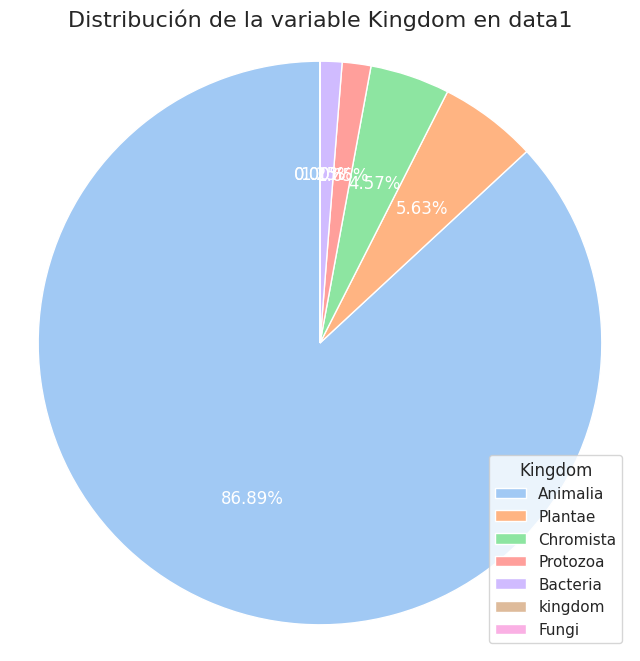

In [ ]:
import seaborn as sns
# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data1['kingdom'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Gráfico de pie con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.2f%%',
                                  textprops=dict(color="w"), startangle=90)

# Añadir una leyenda en la parte inferior derecha
plt.legend(wedges, labels, title='Kingdom', bbox_to_anchor=(1, 0), loc="lower right")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Kingdom en data1', fontsize=16)
plt.axis('equal')

plt.show()

Observar Clases de plantae más frecuentes

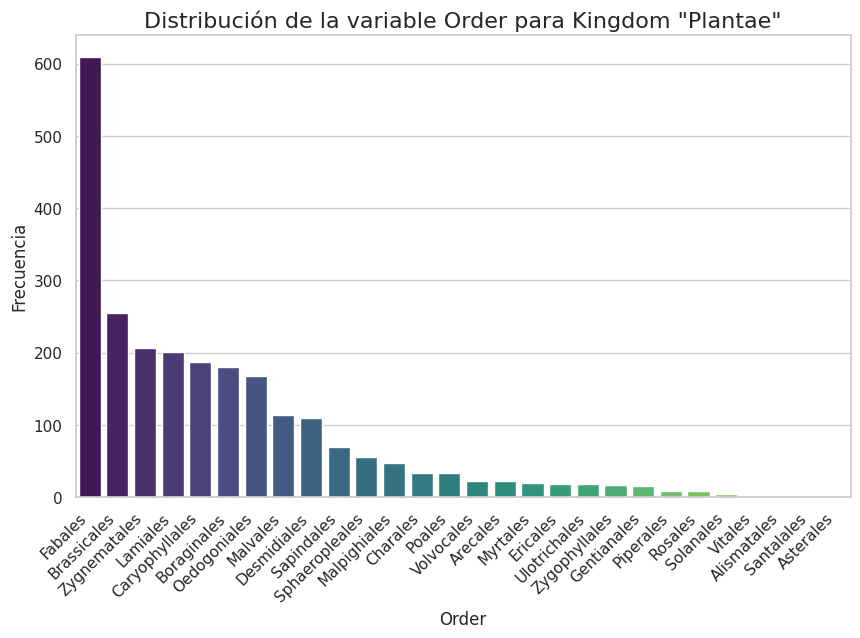

In [ ]:
data1_plantae = data1[data1['kingdom'] == 'Plantae']

# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias de 'class'
value_counts = data1_plantae['order'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Order para Kingdom "Plantae"', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

In [ ]:
order_counts = data1_plantae['order'].value_counts()

# Imprimir el número de observaciones para cada categoría de 'class'
print("Número de Observaciones por Categoría de Class (Kingdom = 'Plantae'):")
for order_name, count in order_counts.items():
  print(f"{order_name}: {count}")

Número de Observaciones por Categoría de Class (Kingdom = 'Plantae'):
Fabales: 609
Brassicales: 255
Zygnematales: 207
Lamiales: 201
Caryophyllales: 187
Boraginales: 180
Oedogoniales: 168
Malvales: 114
Desmidiales: 110
Sapindales: 70
Sphaeropleales: 55
Malpighiales: 48
Charales: 34
Poales: 33
Volvocales: 22
Arecales: 22
Myrtales: 20
Ericales: 18
Ulotrichales: 18
Zygophyllales: 17
Gentianales: 15
Piperales: 8
Rosales: 8
Solanales: 4
Vitales: 3
Alismatales: 2
Santalales: 1
Asterales: 1


Visualización para data2 - Censo forestal asociado al nuevo cauce del arroyo Bruno, municipio de Albania, La Guajira cfb8

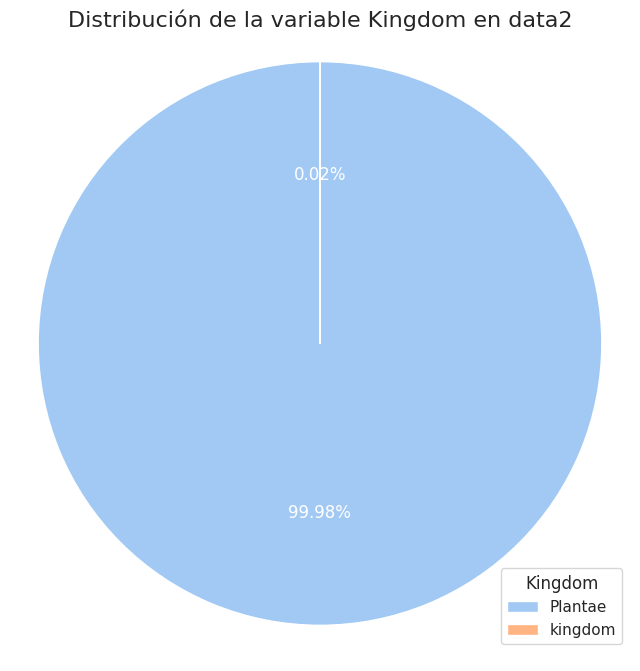

In [ ]:
sns.set(style="whitegrid")

# Calcular las frecuencias
value_counts = data2['kingdom'].value_counts()

# Etiquetas y datos
labels = value_counts.index
sizes = value_counts.values

# Gráfico de pie con seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.2f%%',
                                  textprops=dict(color="w"), startangle=90)

# Añadir una leyenda en la parte inferior derecha
plt.legend(wedges, labels, title='Kingdom', bbox_to_anchor=(1, 0), loc="lower right")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Kingdom en data2', fontsize=16)
plt.axis('equal')

plt.show()

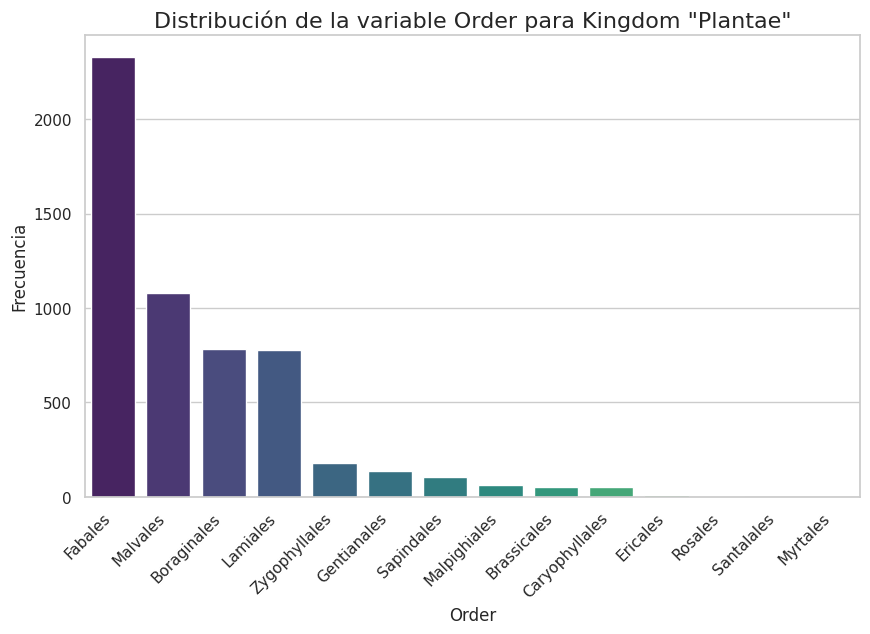

In [ ]:
data2_plantae = data2[data2['kingdom'] == 'Plantae']

# Configuración de estilo de seaborn para mejorar la apariencia del gráfico
sns.set(style="whitegrid")

# Calcular las frecuencias de 'class'
value_counts = data2_plantae['order'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Ajustes adicionales para mejorar la presentación
plt.title('Distribución de la variable Order para Kingdom "Plantae"', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

In [ ]:
order_counts = data2_plantae['order'].value_counts()

# Imprimir el número de observaciones para cada categoría de 'Order'
print("Número de Observaciones por Categoría de Order (Kingdom = 'Plantae'):")
for order_name, count in order_counts.items():
  print(f"{order_name}: {count}")

Número de Observaciones por Categoría de Order (Kingdom = 'Plantae'):
Fabales: 2329
Malvales: 1082
Boraginales: 784
Lamiales: 780
Zygophyllales: 181
Gentianales: 138
Sapindales: 107
Malpighiales: 61
Brassicales: 55
Caryophyllales: 51
Ericales: 9
Rosales: 7
Santalales: 1
Myrtales: 1


## Prueba de hipótesis por proporción

Se sabe que los datos so una descripción de la fauna, flora y cuerpos hidrobiológicos de arroyo Bruno, compendiados de 2017 - 2022. Se combinaron estos datos en 'data1' con el objetivo de analizarlos en conjunto vs 'data2' que posee el censo forestal y de flora del arroyo Bruno en 2020.

Se busca inferir la importancia y la clasificación taxonómica más relevante para el desarrollo de una determinada proporción del reino 'Animalia', es decir, que parte de la existencia en la proporción 'Animalia' se explica por la proporción 'Plantae'

Se realizará una prueba de hipótesis por proporción, la cual se busca que explique ¿Qué proporción y cual clasificación taxonómica de 'Plantae' explica la distribución y proporción de 'Animalia'? Con el objetivo de generar medidas que pueda tomar cerrejón para mitigar el impacto del cambio del cauce del arroyo.

**HIPÓTESIS**
- **H0 (NULA)**:  *No hay diferencia significativa entre las proporciones de Plantae en data1 y data2 con respecto a Animalia de data1*
- **H1 (Alternativa):** *Hay diferencia significativa entre las proporciones de Plantae en data1 y data2 con respecto a Animalia de data1*
- Alfa = 0.05

In [ ]:
import statsmodels.api as sm

# Contar las observaciones en cada categoría
count_plantae_data1 = data1[data1['kingdom'] == 'Plantae'].shape[0]
count_animalia_data1 = data1[data1['kingdom'] == 'Animalia'].shape[0]

count_plantae_data2 = data2[data2['kingdom'] == 'Plantae'].shape[0]

# Tamaños de muestra
n_data1 = len(data1)
n_data2 = len(data2)

# Proporciones observadas
p_plantae_data1 = count_plantae_data1 / n_data1
p_animalia_data1 = count_animalia_data1 / n_data1
p_plantae_data2 = count_plantae_data2 / n_data2

# Realiza la prueba de proporciones de Z para comparar 'Plantae' en data1 con 'Animalia' en data1
z_score_data1, p_value_data1 = sm.stats.proportions_ztest([count_plantae_data1, count_animalia_data1], [n_data1, n_data1])

# Realiza la prueba de proporciones de Z para comparar 'Plantae' en data2 con 'Animalia' en data1
z_score_data2, p_value_data2 = sm.stats.proportions_ztest([count_plantae_data2, count_animalia_data1], [n_data2, n_data1])

# Imprime los resultados
print(f"Proporción de 'Plantae' en data1: {p_plantae_data1:.6f}")
print(f"Proporción de 'Animalia' en data1: {p_animalia_data1:.6f}")
print(f"Proporción de 'Plantae' en data2: {p_plantae_data2:.6f}")

print("\nPrueba de proporciones de Z para 'Plantae' en data1 vs. 'Animalia' en data1:")
print(f"Z Score: {z_score_data1}")
print(f"P-Value: {p_value_data1}")

print("\nPrueba de proporciones de Z para 'Plantae' en data2 vs. 'Animalia' en data1:")
print(f"Z Score: {z_score_data2}")
print(f"P-Value: {p_value_data2}")

Proporción de 'Plantae' en data1: 0.056333
Proporción de 'Animalia' en data1: 0.868932
Proporción de 'Plantae' en data2: 0.999821

Prueba de proporciones de Z para 'Plantae' en data1 vs. 'Animalia' en data1:
Z Score: -240.42904631096664
P-Value: 0.0

Prueba de proporciones de Z para 'Plantae' en data2 vs. 'Animalia' en data1:
Z Score: 28.742465496821026
P-Value: 1.1250939859328707e-181


**CONCLUSIONES ESTADÍSTICAS**

**Prueba de Proporciones de Z para 'Plantae' en data1 vs. 'Animalia' en data1:**

Z Score: -240.43

P-Value: 0.0 (prácticamente cero)


Se obtiene un Z Score extremadamente bajo y un p-value muy cercano a cero. Esto indica una diferencia altamente significativa en las proporciones de 'Plantae' y 'Animalia' en data1. En términos prácticos, la proporción de 'Animalia' es significativamente mayor que la proporción de 'Plantae'.

**Prueba de Proporciones de Z para 'Plantae' en data2 vs. 'Animalia' en data1:**

Z Score: 28.74

P-Value: 1.1250939859328707e-181 (muy cercano a cero)

Se obtiene un Z Score alto y un p-value prácticamente cero. Esto indica una diferencia altamente significativa en las proporciones de 'Plantae' y 'Animalia' entre data2 y data1. En otras palabras, la proporción de 'Plantae' en data2 es significativamente diferente de la proporción de 'Animalia' en data1.
Este resultado es coherente teniendo en cuenta que data2 solo posee 4437 observaciones en total las cuales pertenecen a plantae y data1 posee 1731 respectivamente y en total mas de 40.000 observaciones.

Por lo anterior se concluye que es viable tomar una proporción *0.05:1* para data1 (plantae vs Animalia) y *0.1:1* (Plantae vs Animalia) para data2 vs data1 respectivamente.

**PRUEBA CHI-CUADRADO PARA ASOCIACIÓN ENTRE ANIMALIA Y PLANTAE**

Se busca analizar si hay una relación significativa entre la clasificación taxonómica en la escala ORDEN de Plantae vs Animalia de data1 y Plantae vs Animalia de data2.

Chi-Square
- H0: Las variables son independientes
- H1: Las variables no son independientes
- Alfa: 0.05

In [ ]:
#Determinar la clasificación taxonómica más importante
#Determinar relación de Animalia vs Plantae mediante contingencia con data1 vs data2
from scipy.stats import chi2_contingency

# Crear tablas de contingencia
contingency_table = pd.crosstab(data1['order'], data1['kingdom'])
contingency_table2 = pd.crosstab(data2['order'], data1['kingdom'])  # Nota: usando data1['kingdom'] como referencia

# Realizar la prueba de chi-cuadrado
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir los resultados
print("Tabla de contingencia para data1:")
print(contingency_table)

print("\nPrueba de chi-cuadrado para data1:")
print(f"Estadístico de chi-cuadrado: {chi2_stat}")
print(f"P-Value: {p_value}")

# Realizar la prueba de chi-cuadrado para data2 (usando data1['kingdom'] como referencia)
chi2_stat2, p_value2, _, _ = chi2_contingency(contingency_table2)

# Imprimir los resultados para data2
print("\nTabla de contingencia para data2:")
print(contingency_table2)

print("\nPrueba de chi-cuadrado para data2 (usando data1['kingdom'] como referencia):")
print(f"Estadístico de chi-cuadrado: {chi2_stat2}")
print(f"P-Value: {p_value2}")

Tabla de contingencia para data1:
kingdom          Animalia  Bacteria  Chromista  Fungi  Plantae  Protozoa  \
order                                                                      
Accipitriformes       229         0          0      0        0         0   
Achnanthales            0         0         40      0        0         0   
Aconchulinida           0         0          0      0        0        42   
Alismatales             0         0          0      0        2         0   
Anaulales               0         0         17      0        0         0   
...                   ...       ...        ...    ...      ...       ...   
Vitales                 0         0          0      0        3         0   
Volvocales              0         0          0      0       22         0   
Zygnematales            0         0          0      0      207         0   
Zygophyllales           0         0          0      0       17         0   
order                   0         0          0      0 

**CONCLUSIONES ESTADÍSTICAS**

Prueba de chi-cuadrado para data1:

- El estadístico de chi-cuadrado es 202590.0, lo que indica que hay una asociación significativa entre las variables.
- El p-value es 0.0, lo que sugiere que hay evidencia significativa para rechazar la hipótesis nula de que las variables son independientes. En otras palabras, hay una asociación significativa entre la presencia de diferentes categorías y la clasificación taxonómica en data1.

Prueba de chi-cuadrado para data2:

- El estadístico de chi-cuadrado es 5587.0, indicando una asociación significativa entre las variables.
- El p-value es 0.0, lo que sugiere que hay evidencia significativa para rechazar la hipótesis nula de independencia. En este caso, se está evaluando la asociación en data2 utilizando la clasificación taxonómica de 'Animalia' en data1 como referencia.

Se concluye que la presencia de ciertas categorías taxonómicas de Animalia están relacionadas con categorías taxonómicas de Plantae en la escala 'Order' por lo que determinaremos cuales son los ordenes de mayor relevancia de Plantae para la presencia de especies de Animalia y en qué escala (0.05:1 y 0.1:1) con el objetivo de generar conclusiones de mejora para la toma por parte de Cerrejón.

TOP 10 de los ordenes más reelevantes para la presencia de Animalia con base los residuos estudentizados de la tabla de contingencia de Chi-Square model

In [ ]:
# Calcular los residuos estandarizados
expected_frequencies = pd.DataFrame(chi2_contingency(contingency_table)[3])
residuals = (contingency_table - expected_frequencies) / expected_frequencies

# Calcular la suma de los residuos estandarizados por cada orden
residual_sum = residuals.sum(axis=1)

# Crear un DataFrame con la orden y la suma de residuos estandarizados
result_df = pd.DataFrame({'order': residual_sum.index, 'residual_sum': residual_sum})

# Ordenar el DataFrame por la suma de residuos estandarizados en orden descendente
result_df = result_df.sort_values(by='residual_sum', ascending=False)

# Tomar el top 10
top_10_orders = result_df.head(10)
print("Top 10 de órdenes con mayor repetición y relevancia para Animalia:")
print(top_10_orders)

Top 10 de órdenes con mayor repetición y relevancia para Animalia:
                                 order  residual_sum
0                                    0           0.0
Diplostraca                Diplostraca           0.0
Coleoptera                  Coleoptera           0.0
Columbiformes            Columbiformes           0.0
Coraciiformes            Coraciiformes           0.0
Cuculiformes              Cuculiformes           0.0
Cyanobacteriales      Cyanobacteriales           0.0
Cyclopoida                  Cyclopoida           0.0
Cymbellales                Cymbellales           0.0
Cyprinodontiformes  Cyprinodontiformes           0.0


#### CONCLUSIONES Y ACCIONES SUGERIDAS PARA CERREJON

Se concluye que la clasificación top 5 del orden de plantas para las cuales hay mayor influencia en la presencia de Aniamlia es Zygophyllales, Sapindales, Santalales, Rosales, Myrtales. Este tipo taxonómico de plantas corresponde aproximadamente al 8% de significancia para la presencia del reino Animalia de acuerdo a lo observado en los registros biológicos, es decir, ara una futura compensación, cerrejón debe enfocarse en tener un 80% de plantas de este tipo en un territorio de conservación para atraer un 100% de las mismas especies de Animalia observadas y en la misma proporción.

Este orden de plantas incluye a la siguiente lista que puede ser compensada por cerrejón:

1. Zygophyllales:

- Tribulus terrestris (Caltrop): Una planta herbácea con espinas afiladas, a menudo considerada una maleza.

2. Sapindales:

- Litchi chinensis (Lichi): Un árbol tropical conocido por su fruta dulce y jugosa llamada lichi.
Acer spp. (Acer): Incluye varias especies de arces, algunos de los cuales pueden tener hojas coloridas en otoño.
- Sapindus spp. (Sapindus): Incluye especies cuyas bayas se utilizan para hacer jabón natural, conocido como "soapberry".
3. Santalales:

- Santalum album (Sándalo): Un árbol cuya madera aromática se utiliza para producir aceite de sándalo.
- Viscum album (Muérdago europeo): Una planta parasitaria conocida como muérdago, a menudo asociada con festividades navideñas.
4. Rosales:

- Rosa spp. (Rosas): Incluye una variedad de especies y cultivares de rosas, flores conocidas por su belleza y fragancia.
- Malus domestica (Manzano): El manzano, que produce la conocida fruta, la manzana.
5. Myrtales:

- Myrtus communis (Mirto): Arbusto con hojas aromáticas, conocido por sus pequeñas bayas y se utiliza en la producción de aceite esencial.
- Psidium guajava (Guayaba): Árbol que produce la fruta guayaba, apreciada por su sabor dulce y aroma.


CORRELACIÓN ENTRE PLANTAS Y ANIMALES




**Especies de Plantae de data1**

Únicas: 179

In [ ]:
especies_plantas = data1[data1["kingdom"] == 'Plantae']["scientificName"].unique()
num_plantas = len(especies_plantas)
print(especies_plantas)
print('El número de especies únicas de plantas es: ', num_plantas)

['Lonchocarpus sanctae-martae Pittier' 'Prosopis juliflora (Sw.) DC.'
 'Senna bicapsularis (L.) Roxb.' 'Dioclea sericea Kunth'
 'Cissus verticillata (L.) Nicolson & C.E.Jarvis'
 'Pithecellobium lanceolatum (Humb. & Bonpl. ex Willd.) Benth.'
 'Cordia alba (Jacq.) Roem. & Schult.' 'Machaerium arboreum (Jacq.) Vogel'
 'Quadrella odoratissima (Jacq.) Hutch.'
 'Coccoloba densifrons Mart. ex Meisn.' 'Bulnesia arborea (Jacq.) Engl.'
 'Caesalpinia ebano H.Karst.' 'Acanthocereus tetragonus (L.) Hummelinck'
 'Passiflora L.' 'Senna obtusifolia (L.) H.S.Irwin & Barneby'
 'Albizia saman (Jacq.) Merr.' 'Cynophalla verrucosa (Jacq.) J.Presl'
 'Bourreria cumanensis (Loefl.) O.E.Schulz'
 'Caesalpinia coriaria Willd. ex Kunth'
 'Copernicia prunifera (Mill.) H.E.Moore' 'Guazuma ulmifolia Lam.'
 'Crataeva tapia L.' 'Tabebuia rosea (Bertol.) Bertero ex A.DC.'
 'Ziziphus angolito Standl.' 'Bactris major Jacq.'
 'Dolichandra uncata (Andrews) L.G.Lohmann' 'Sida glomerata Cav.'
 'Myrospermum frutescens Jacq.' 

**Especies de Animalia en Data1**

Únicos: 825

In [ ]:
especies_animales = data1[data1["kingdom"] == 'Animalia']["scientificName"].unique()
num_animales = len(especies_animales)
print(especies_plantas)
print('El número de especies únicas de animales es: ', num_animales)

['Lonchocarpus sanctae-martae Pittier' 'Prosopis juliflora (Sw.) DC.'
 'Senna bicapsularis (L.) Roxb.' 'Dioclea sericea Kunth'
 'Cissus verticillata (L.) Nicolson & C.E.Jarvis'
 'Pithecellobium lanceolatum (Humb. & Bonpl. ex Willd.) Benth.'
 'Cordia alba (Jacq.) Roem. & Schult.' 'Machaerium arboreum (Jacq.) Vogel'
 'Quadrella odoratissima (Jacq.) Hutch.'
 'Coccoloba densifrons Mart. ex Meisn.' 'Bulnesia arborea (Jacq.) Engl.'
 'Caesalpinia ebano H.Karst.' 'Acanthocereus tetragonus (L.) Hummelinck'
 'Passiflora L.' 'Senna obtusifolia (L.) H.S.Irwin & Barneby'
 'Albizia saman (Jacq.) Merr.' 'Cynophalla verrucosa (Jacq.) J.Presl'
 'Bourreria cumanensis (Loefl.) O.E.Schulz'
 'Caesalpinia coriaria Willd. ex Kunth'
 'Copernicia prunifera (Mill.) H.E.Moore' 'Guazuma ulmifolia Lam.'
 'Crataeva tapia L.' 'Tabebuia rosea (Bertol.) Bertero ex A.DC.'
 'Ziziphus angolito Standl.' 'Bactris major Jacq.'
 'Dolichandra uncata (Andrews) L.G.Lohmann' 'Sida glomerata Cav.'
 'Myrospermum frutescens Jacq.' 

**Especies de Plantae en Data2**

Únicas especies de plantas: 69

In [ ]:
especies_plantas = data2[data2["kingdom"] == 'Plantae']["scientificName"].unique()
num_plantas = len(especies_plantas)
print(especies_plantas)
print('El número de especies únicas de plantas es: ', num_plantas)

['Albizia saman (Jacq.) Merr.' 'Cordia dentata Poir.'
 'Leucaena leucocephala (Lam.) de Wit' 'Ceiba pentandra (L.) Gaertn.'
 'Spondias mombin Jacq.' 'Vachellia tortuosa (L.) Seigler & Ebinger'
 'Bulnesia arborea (Jacq.) Engl.' 'Pseudobombax Dugand'
 'Vachellia macracantha (Humb. & Bonpl. ex Willd.) Seigler & Ebinger'
 'Senegalia polyphylla (DC.) Britton & Rose' 'Guazuma ulmifolia Lam.'
 'Handroanthus impetiginosum (Mart. ex DC.) Mattos'
 'Randia obcordata S.Watson' 'Senna atomaria (L.) H.S.Irwin & Barneby'
 'Handroanthus billbergii (Bureau & K.Schum.) S.O.Grose'
 'Sterculia apetala (Jacq.) H.Karst.'
 'Pithecellobium roseum (Vahl) Barneby & J.W.Grimes'
 'Malpighia emarginata DC.' 'Hura crepitans L.' 'Bravaisia DC.'
 'Prosopis juliflora (Sw.) DC.' 'Achatocarpus nigricans Triana'
 'Calliandra magdalenae (Bertero ex DC.) Benth.' 'Crateva tapia L.'
 'Caesalpinia ebano H.Karst.' 'Aspidosperma polyneuron Müll.Arg.'
 'Anacardium excelsum (Bertero & Balb.) Skeels'
 'Lonchocarpus sanctae-martae 

**Número de plantas únicas vs número de animales únicos**

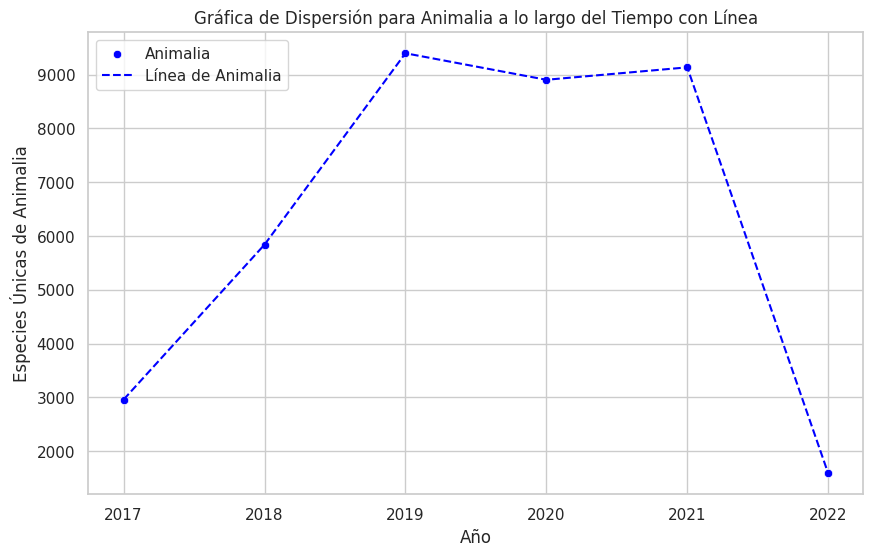

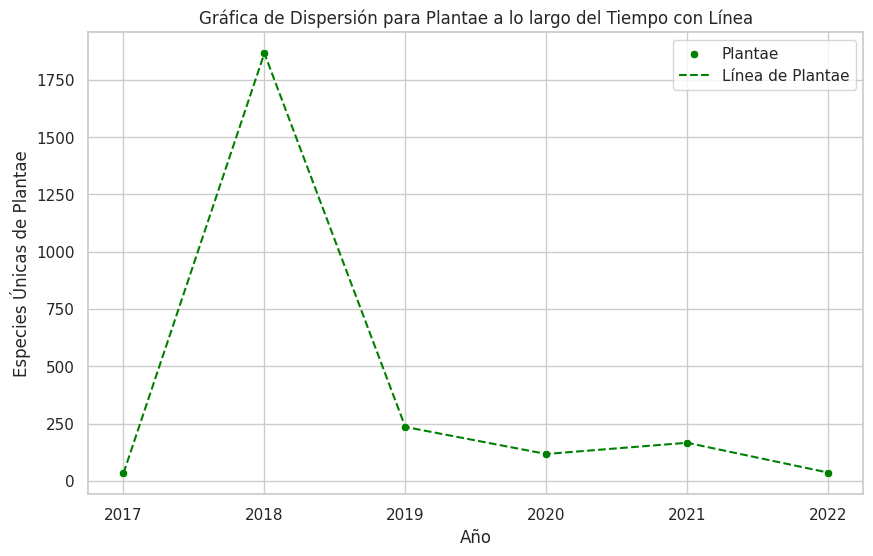

Matriz de Correlación:
              Year  Animalia   Plantae
Year      1.000000  0.039960 -0.387314
Animalia  0.039960  1.000000  0.028959
Plantae  -0.387314  0.028959  1.000000

Coeficiente de Correlación entre Animalia y Plantae: 0.028958920897012706


In [ ]:
# Filtra las especies únicas de Animalia y Plantae
especies_animalia = data1[data1["kingdom"] == 'Animalia']["scientificName"].unique()
especies_plantae = data1[data1["kingdom"] == 'Plantae']["scientificName"].unique()

# Crea DataFrames separados para Animalia y Plantae
df_animalia = pd.DataFrame({
    'Year': data1[data1['kingdom'] == 'Animalia']['year'],
    'Animalia': 1  # Se establece a 1 para contar las especies únicas
})

df_plantae = pd.DataFrame({
    'Year': data1[data1['kingdom'] == 'Plantae']['year'],
    'Plantae': 1  # Se establece a 1 para contar las especies únicas
})

# Agrupa por año y cuenta el número de especies únicas para Animalia y Plantae
df_animalia = df_animalia.groupby('Year').sum().reset_index()
df_plantae = df_plantae.groupby('Year').sum().reset_index()

# Combina los DataFrames de Animalia y Plantae por el año
df_merged = pd.merge(df_animalia, df_plantae, on='Year', how='outer')

# Calcula la matriz de correlación
correlation_matrix = df_merged.corr()

# Calcula el coeficiente de correlación entre Animalia y Plantae
correlation_coefficient = df_merged['Animalia'].corr(df_merged['Plantae'])

# Crea una gráfica de dispersión para Animalia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Animalia', label='Animalia', color='blue')
sns.lineplot(data=df_merged, x='Year', y='Animalia', color='blue', linestyle='--', label='Densidad de Animalia')
plt.title('Gráfica de Dispersión para Animalia a lo largo del Tiempo con Línea')
plt.xlabel('Año')
plt.ylabel('Especies Únicas de Animalia')
plt.legend()
plt.show()

# Crea una gráfica de dispersión para Plantae
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Plantae', label='Plantae', color='green')
sns.lineplot(data=df_merged, x='Year', y='Plantae', color='green', linestyle='--', label='Densidad de Plantae')
plt.title('Gráfica de Dispersión para Plantae a lo largo del Tiempo con Línea')
plt.xlabel('Año')
plt.ylabel('Especies Únicas de Plantae')
plt.legend()
plt.show()

# Muestra la matriz de correlación y el coeficiente de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

print("\nCoeficiente de Correlación entre Animalia y Plantae:", correlation_coefficient)

**Modelo de regresión lineal entre número de especies unicas vs año**

Al obtener un R ajustado bajo en los modelos de regresión lineal simple para Animalia vs Year y Plantae vs Year concluimos que no hay una correlación significatica entre las variables, sin embargo, en términos de biología, el coeficiente de correlación bajo e inversamente proporcional indica una disminución anual en la riqueza de especies de acuerdo al indicador de riqueza de especies de Chao

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import linear_rainbow

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:               Animalia   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.248
Method:                 Least Squares   F-statistic:                  0.006397
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.940
Time:                        01:15:19   Log-Likelihood:                -56.756
No. Observations:                   6   AIC:                             117.5
Df Residuals:                       4   BIC:                             117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.405e+05   1.84e+06     -0.077      0.9

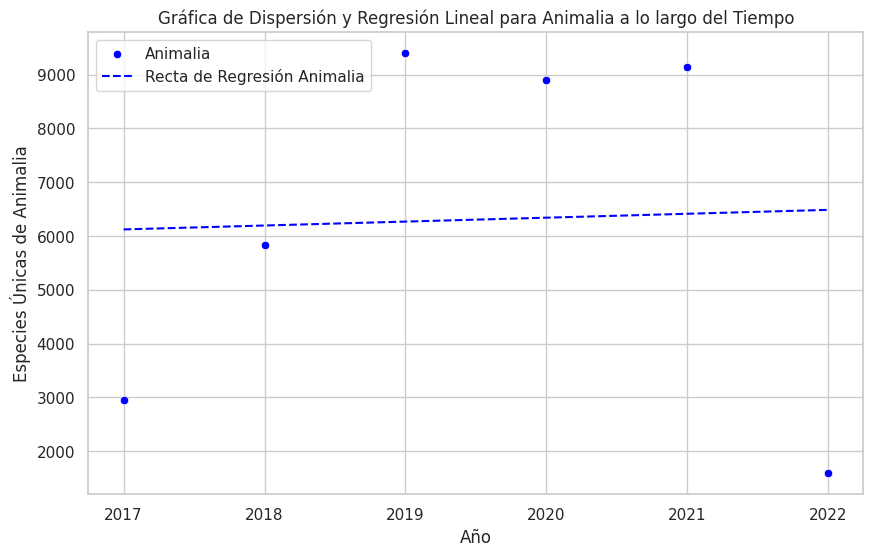

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                Plantae   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.7059
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.448
Time:                        01:15:20   Log-Likelihood:                -46.935
No. Observations:                   6   AIC:                             97.87
Df Residuals:                       4   BIC:                             97.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.004e+05   3.57e+05      0.841      0.4

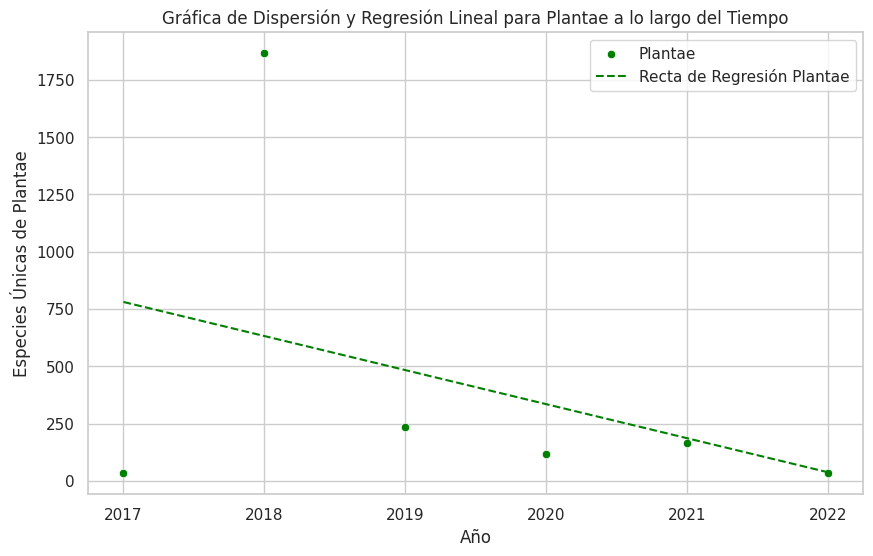

Matriz de Correlación:
              Year  Animalia   Plantae
Year      1.000000  0.039960 -0.387314
Animalia  0.039960  1.000000  0.028959
Plantae  -0.387314  0.028959  1.000000

Coeficiente de Correlación entre Animalia y Plantae: 0.028958920897012706


In [ ]:
# Filtra las especies únicas de Animalia y Plantae
especies_animalia = data1[data1["kingdom"] == 'Animalia']["scientificName"].unique()
especies_plantae = data1[data1["kingdom"] == 'Plantae']["scientificName"].unique()

# Crea DataFrames separados para Animalia y Plantae
df_animalia = pd.DataFrame({
    'Year': data1[data1['kingdom'] == 'Animalia']['year'],
    'Animalia': 1  # Se establece a 1 para contar las especies únicas
})

df_plantae = pd.DataFrame({
    'Year': data1[data1['kingdom'] == 'Plantae']['year'],
    'Plantae': 1  # Se establece a 1 para contar las especies únicas
})

# Agrupa por año y cuenta el número de especies únicas para Animalia y Plantae
df_animalia = df_animalia.groupby('Year').sum().reset_index()
df_plantae = df_plantae.groupby('Year').sum().reset_index()

# Combina los DataFrames de Animalia y Plantae por el año
df_merged = pd.merge(df_animalia, df_plantae, on='Year', how='outer')

# Calcula la matriz de correlación
correlation_matrix = df_merged.corr()

# Calcula el coeficiente de correlación entre Animalia y Plantae
correlation_coefficient = df_merged['Animalia'].corr(df_merged['Plantae'])

# Crea una gráfica de dispersión para Animalia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Animalia', label='Animalia', color='blue')

# Ajusta un modelo de regresión lineal para Animalia vs Year
X_animalia = sm.add_constant(df_merged['Year'])
model_animalia = sm.OLS(df_merged['Animalia'], X_animalia).fit()

# Verificación de supuestos
residuals_animalia = model_animalia.resid
het_breuschpagan_test_animalia = het_breuschpagan(residuals_animalia, X_animalia)
rainbow_statistic_animalia, rainbow_p_value_animalia = linear_rainbow(model_animalia)

# Muestra el modelo de regresión y los resultados del test de Breusch-Pagan y Rainbow
print(model_animalia.summary())
print("\nBreusch-Pagan Test (Animalia): p-value =", het_breuschpagan_test_animalia[1])
print("Rainbow Test (Animalia): p-value =", rainbow_p_value_animalia)

# Agrega la recta de la regresión lineal
plt.plot(df_merged['Year'], model_animalia.predict(X_animalia), color='blue', linestyle='--', label='Recta de Regresión Animalia')

plt.title('Gráfica de Dispersión y Regresión Lineal para Animalia a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Especies Únicas de Animalia')
plt.legend()
plt.show()

# Crea una gráfica de dispersión para Plantae
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Plantae', label='Plantae', color='green')

# Ajusta un modelo de regresión lineal para Plantae vs Year
X_plantae = sm.add_constant(df_merged['Year'])
model_plantae = sm.OLS(df_merged['Plantae'], X_plantae).fit()

# Verificación de supuestos
residuals_plantae = model_plantae.resid
het_breuschpagan_test_plantae = het_breuschpagan(residuals_plantae, X_plantae)
rainbow_statistic_plantae, rainbow_p_value_plantae = linear_rainbow(model_plantae)

# Muestra el modelo de regresión y los resultados del test de Breusch-Pagan y Rainbow
print(model_plantae.summary())
print("\nBreusch-Pagan Test (Plantae): p-value =", het_breuschpagan_test_plantae[1])
print("Rainbow Test (Plantae): p-value =", rainbow_p_value_plantae)

# Agrega la recta de la regresión lineal
plt.plot(df_merged['Year'], model_plantae.predict(X_plantae), color='green', linestyle='--', label='Recta de Regresión Plantae')

plt.title('Gráfica de Dispersión y Regresión Lineal para Plantae a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Especies Únicas de Plantae')
plt.legend()
plt.show()

# Muestra la matriz de correlación y el coeficiente de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

print("\nCoeficiente de Correlación entre Animalia y Plantae:", correlation_coefficient)

**índice de Chao**

Se comprobará la tendencia inferida en los modelos de regresión lineal simple para cada grupo taxonómico.

A medida que avanzan los años, las especies nuevas que son halladas es cada vez menos, con respecto al número de observaciones.

In [ ]:
from scipy.stats import chisquare

In [ ]:
# Filtra los datos para cada reino (Plantae y Animalia)
datos_plantae = data1[data1['kingdom'] == 'Plantae']
datos_animalia = data1[data1['kingdom'] == 'Animalia']

# Función para calcular el índice de Chao1
def chao1(series):
    observed_species = len(series.unique())
    uniques = series.value_counts()
    S_obs = len(uniques)
    S_singletons = sum(uniques[uniques == 1])
    S_doubletons = sum(uniques[uniques == 2])

    chao1_est = observed_species + (S_singletons * (S_singletons - 1)) / (2 * (S_doubletons + 1))
    return chao1_est

# Calcula el índice de Chao1 para el conjunto de datos completo
chao_total = chao1(data1['species'])

# Calcula el índice de Chao1 para cada año
chao_por_anio = data1.groupby('year')['species'].apply(lambda x: chao1(x))

# Calcula el índice de Chao1 para Plantae y Animalia por año
chao_plantae_por_anio = datos_plantae.groupby('year')['species'].apply(lambda x: chao1(x))
chao_animalia_por_anio = datos_animalia.groupby('year')['species'].apply(lambda x: chao1(x))

# Muestra los resultados
print("Índice de Chao1 para el conjunto de datos completo:", chao_total)
print("\nÍndice de Chao1 por año:")
print(chao_por_anio)
print("\nÍndice de Chao1 para Plantae por año:")
print(chao_plantae_por_anio)
print("\nÍndice de Chao1 para Animalia por año:")
print(chao_animalia_por_anio)

Índice de Chao1 para el conjunto de datos completo: 802.0927835051547

Índice de Chao1 por año:
year
2017.0    164.200000
2018.0    521.095890
2019.0    393.120000
2020.0    411.142857
2021.0    427.887324
2022.0    299.035294
Name: species, dtype: float64

Índice de Chao1 para Plantae por año:
year
2017.0      2.000000
2018.0    144.976744
2019.0      4.000000
2020.0      5.000000
2021.0      8.000000
2022.0      7.428571
Name: species, dtype: float64

Índice de Chao1 para Animalia por año:
year
2017.0    157.230769
2018.0    370.111111
2019.0    374.368421
2020.0    394.142857
2021.0    403.714286
2022.0    282.493151
Name: species, dtype: float64


**Conclusiones estadísticas**

Relacionando el índice de Chao1 para Plantae y Animalia con respecto a los años con el resultado del estimador Beta 1 (pendiente) en el modelo de regresión lineal simple obtenemos los siguientes resultados:
1. Plantae vs Year
- Beta 1: 72.6857

Interpretación: En cuanto al índice de riqueza de especies de Chao1 y la presencia de un dato atípico en el año 2018, periodo en el cual hubo mayor número de registros de observaciones, se deduce biológicamente que la probabilidad de hallar especies nuevas de plantas es subsecuentememte mayor conforme avanzan los años, además se soporta con el hecho de que por cada año nuevo, hay un chance de 72.6857 más de encontrar más numeros de especies del mismo tipo.

2. Animalia vs Year
- Beta 1: -148.5714

Interpretación: En cuanto al índice de riqueza de especies Cao1 y la proporción constante de nuevas especies de Animalia, se concluye que la probabilidad de que en un año siguiente al estudiado y con base a la acumulación de especies, se disminuye en 148.6 especies aproximadamente.

**CURVA DE ACUMULACIÓN DE PROBABILIDAD DE ESPECIES DE CHAO1**

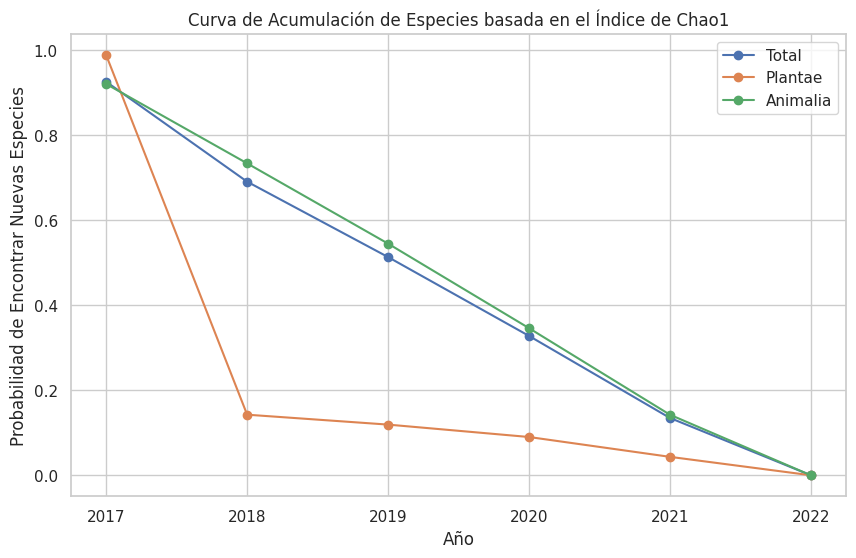

In [ ]:
# Calcula la curva de acumulación de especies
def especies_acumuladas(chao_series):
    especies_acumuladas = chao_series.cumsum()
    total_especies = especies_acumuladas.max()
    probabilidad_nuevas_especies = (total_especies - especies_acumuladas) / total_especies
    return probabilidad_nuevas_especies

# Calcula la curva de acumulación de especies para el conjunto de datos completo
curva_acumulacion_total = especies_acumuladas(chao_por_anio)

# Calcula la curva de acumulación de especies para Plantae y Animalia
curva_acumulacion_plantae = especies_acumuladas(chao_plantae_por_anio)
curva_acumulacion_animalia = especies_acumuladas(chao_animalia_por_anio)

# Grafica las curvas de acumulación de especies
plt.figure(figsize=(10, 6))
plt.plot(chao_por_anio.index, curva_acumulacion_total, label='Total', marker='o')
plt.plot(chao_plantae_por_anio.index, curva_acumulacion_plantae, label='Plantae', marker='o')
plt.plot(chao_animalia_por_anio.index, curva_acumulacion_animalia, label='Animalia', marker='o')

plt.title('Curva de Acumulación de Especies basada en el Índice de Chao1')
plt.xlabel('Año')
plt.ylabel('Probabilidad de Encontrar Nuevas Especies')
plt.legend()
plt.show()

**GRAFICA DEL NUMERO DE ESPECIES ÚNICAS ENCONTRADAS EN LOS MUESTRESO POR AÑO**

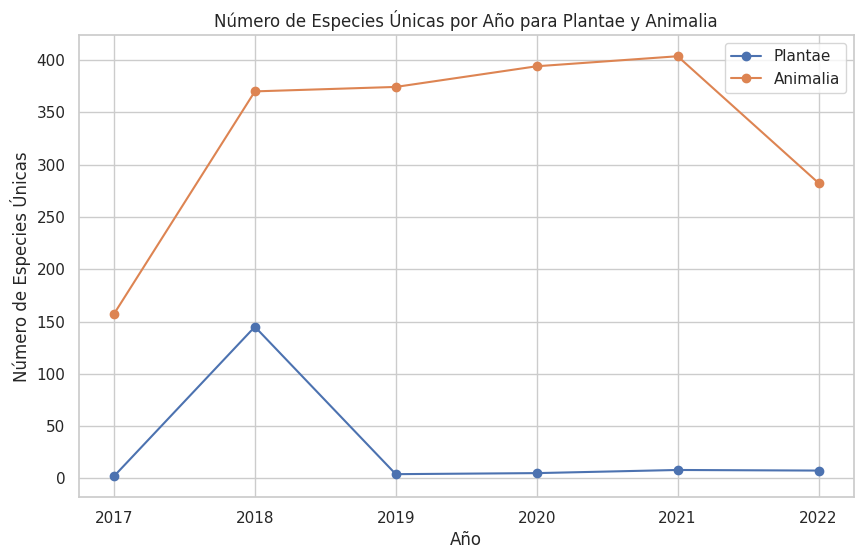

In [ ]:
# Grafica el número de especies únicas por año para Plantae y Animalia
plt.figure(figsize=(10, 6))
plt.plot(chao_plantae_por_anio.index, chao_plantae_por_anio, label='Plantae', marker='o')
plt.plot(chao_animalia_por_anio.index, chao_animalia_por_anio, label='Animalia', marker='o')

plt.title('Número de Especies Únicas por Año para Plantae y Animalia')
plt.xlabel('Año')
plt.ylabel('Número de Especies Únicas')
plt.legend()
plt.show()

**GRAFICA COMBINADA DE PROBABILIDAD DE HALLAR NUEVAS ESPECIES MEDIANTE CHAO1 Y NÚMERO DE ESPECIES ÚNICAS**

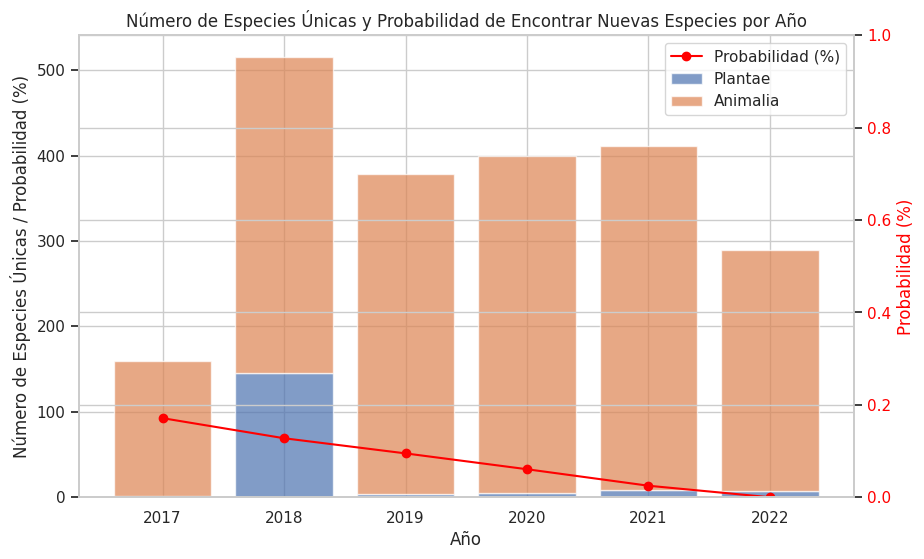

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea un array para el eje x (año)
years = chao_plantae_por_anio.index

# Grafica el número de especies únicas y la probabilidad de encontrar nuevas especies por año
plt.figure(figsize=(10, 6))

# Gráfico de barras para el número de especies únicas
plt.bar(years, chao_plantae_por_anio, label='Plantae', alpha=0.7)
plt.bar(years, chao_animalia_por_anio, bottom=chao_plantae_por_anio, label='Animalia', alpha=0.7)

# Gráfico de línea para la probabilidad de encontrar nuevas especies
plt.plot(years, curva_acumulacion_total * 100, color='red', label='Probabilidad (%)', marker='o')

# Configuración del gráfico
plt.title('Número de Especies Únicas y Probabilidad de Encontrar Nuevas Especies por Año')
plt.xlabel('Año')
plt.ylabel('Número de Especies Únicas / Probabilidad (%)')
plt.legend()

# Ajusta el segundo eje y para la probabilidad
ax2 = plt.gca().twinx()
ax2.set_ylabel('Probabilidad (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()


#### Conclusiones finales de la sección

- Con el objetivo de observar, analizar e inferir acerca de posibles acciones que puede tomar cerrejón para aumentar el nivel de compensación ambiental con base a determinar la proporción de especies de plantas que se debe agregar a una reserva para mantener la misma proporción de 'Animalia', se estudio el índice de Chao1 en data1 que corresponde a las observaciones de datos cercanas al arroyo Bruno, se determinó que la proporción de especies únicas de plantas óptima es cercana a 150 y para obtener un total aproximado de 360 especies únicas de animales.

- En segunda instancia, se concluye que los ordenes de la clasificación taxonómica de 'Plantae' que más deben ser compensados en futuras reservas ecológicas son Zygophyllales, Sapindales, Santalales, Rosales, Myrtales.



## Prueba de hipótesis por porporción para puntos de muestreo específico

Se realizará un test de correlación para verificar si hay correlación significativa entre el número de plantas y animales en general de todos los conjuntos de datos que incluyan registros del reino 'Plantae' y 'Animalia' y posteriormente seleccionar los focos de medición cercanos a los cuerpos hidrobiológicos para determinar la prorporción de especies únicas de Animales en dependencia de la proporción de especies únicas de Plantas a través de pruebas de hipótesis por proporción y test de Chi-cuadrado.

NOMBRE Y ORDEN DE LOS ARROYOS
1. Albania
2. Aguas Blancas
3. Bruno
4. Calaguala
5. Cerrejon
6. Lapuente
7. Paladinez
8. Palomino
9. Ranchería
10. Tabaco

#### Carga de datos

In [ ]:
import pandas as pd
headers = ["gbifID", "datasetKey", "occurrenceID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "infraspecificEpithet", "taxonRank", "scientificName", "verbatimScientificName", "verbatimScientificNameAuthorship", "countryCode", "locality", "stateProvince", "occurrenceStatus", "individualCount", "publishingOrgKey", "decimalLatitude", "decimalLongitude", "coordinateUncertaintyInMeters", "coordinatePrecision", "elevation", "elevationAccuracy", "depth", "depthAccuracy", "eventDate", "day", "month", "year", "taxonKey", "speciesKey", "basisOfRecord", "institutionCode", "collectionCode", "catalogNumber", "recordNumber", "identifiedBy", "dateIdentified", "license", "rightsHolder", "recordedBy", "typeStatus", "establishmentMeans", "lastInterpreted", "mediaType", "issue"]

In [ ]:
mff1 = pd.read_csv('mff1.csv', names = headers, sep ='\t')
cff3 = pd.read_csv('cff3.csv', names = headers, sep ='\t')
ccff6 = pd.read_csv('ccff6.csv', names = headers, sep ='\t')
cfb8 = pd.read_csv('cfb8.csv', names = headers, sep ='\t')
cffpb9 = pd.read_csv('cffpb9.csv', names = headers, sep ='\t')

arroyos = pd.read_csv('UbicacionEventosMuestreo.csv', sep = ';')
arroyos.head()

<ipython-input-53-18e0f51d7854>:1: DtypeWarning: Columns (0,19,21,22,23,24,25,26,27,28,30,31,32,33,34,37,38,40,41,43,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  mff1 = pd.read_csv('mff1.csv', names = headers, sep ='\t')
<ipython-input-53-18e0f51d7854>:2: DtypeWarning: Columns (0,19,21,22,23,24,25,26,27,28,30,31,32,33,34,37,38,40,41,43,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  cff3 = pd.read_csv('cff3.csv', names = headers, sep ='\t')


,Unnamed: 0,Localidad,Rep,Latitud,Longitud,Year,Localidad.Interp,Arroyo
0,15,Rehabilitacion Aguas Blancas,1,111.015,-72.691.306,2009,AguasBlancas_A,AguasBlancas
1,36,Valle medio del Rio Rancheria,17,11.102.194,-72.692.694,2017,AguasBlancas_B,AguasBlancas
2,38,Valle medio del Rio Rancheria,19,111.625,-72.616.639,2016,Albania_A,Albania
3,31,Valle medio del Rio Rancheria,12,11.156.194,-72.613.944,2017,Albania_B,Albania
4,2,Arroyo Bruno (A. Br.),1,11.166.278,-72.544.667,2005,Bruno_A,Bruno


Combinar todos los conjuntos de datos

In [ ]:
data3 = pd.concat([mff1, cff3, ccff6, cfb8, cffpb9], axis =0, ignore_index=True)
data3.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
122460,3909425305,cf5bf349-8151-4437-9298-8dc285726fb7,Cerrejon:PuertoBolivar-Herpetos:34,Animalia,Chordata,Squamata,NaN,Iguanidae,Iguana,Iguana iguana,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:14:40.416Z,NaN,NaN
122461,3909425304,cf5bf349-8151-4437-9298-8dc285726fb7,Cerrejon:PuertoBolivar-Herpetos:33,Animalia,Chordata,Squamata,NaN,Iguanidae,Iguana,Iguana iguana,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:14:40.412Z,NaN,NaN
122462,3909425303,cf5bf349-8151-4437-9298-8dc285726fb7,Cerrejon:PuertoBolivar-Herpetos:32,Animalia,Chordata,Squamata,NaN,Gekkonidae,Hemidactylus,Hemidactylus frenatus,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:14:40.406Z,NaN,NaN
122463,3909425302,cf5bf349-8151-4437-9298-8dc285726fb7,Cerrejon:PuertoBolivar-Herpetos:31,Animalia,Chordata,Squamata,NaN,Sphaerodactylidae,Gonatodes,Gonatodes albogularis,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:14:40.362Z,NaN,NaN
122464,3909425301,cf5bf349-8151-4437-9298-8dc285726fb7,Cerrejon:PuertoBolivar-Herpetos:30,Animalia,Chordata,Squamata,NaN,Sphaerodactylidae,Gonatodes,Gonatodes albogularis,...,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,NaN,NaN,2023-08-26T11:14:40.357Z,NaN,NaN


Clasificar por ubicación los registros de cada arroyo

**Aguas blancas**
No se encuentra ninguna coincidencia de coordenadas geográficas para los registros del arroyo albania

In [ ]:
arroyos['Latitud'] = pd.to_numeric(arroyos['Latitud'], errors='coerce')
arroyos['Longitud'] = pd.to_numeric(arroyos['Longitud'], errors='coerce')

condicion_filtro = (
    (arroyos['Latitud'] == 111015) & (arroyos['Longitud'] == -72691306) |
 (arroyos['Latitud'] == 11102194) & (arroyos['Longitud'] == -72692694)
)

aguas_blancas = arroyos[condicion_filtro]
aguas_blancas.head()

,Unnamed: 0,Localidad,Rep,Latitud,Longitud,Year,Localidad.Interp,Arroyo


**Albania**



In [ ]:
# arroyos['Latitud'] = pd.to_numeric(arroyos['Latitud'], errors='coerce')
# arroyos['Longitud'] = pd.to_numeric(arroyos['Longitud'], errors='coerce')

# Creamos un DataFrame vacío llamado 'Albania'
albania = pd.DataFrame()

# Lista de coordenadas de arroyos que quieres buscar
coordenadas_arroyos = [
    ("111.625", "-72.616.639"),
    ("11.156.194", "-72.613.944")
]

# Iteramos sobre las coordenadas de arroyos
for lat, lon in coordenadas_arroyos:
    # Filtramos las observaciones en data3 que coincidan con las coordenadas del arroyo
    filtro = (data3['decimalLatitude'] == lat) & (data3['decimalLongitude'] == lon)

    # Si hay coincidencias, las agregamos al DataFrame 'Albania'
    if any(filtro):
        albania = pd.concat([albania, data3[filtro]])

# Mostrar el resultado final
albania.head()

""


**AUASBLANCAS**

In [ ]:
# Creamos un DataFrame vacío llamado 'Albania'
aguasblancas = pd.DataFrame()

# Lista de coordenadas de arroyos que quieres buscar
coordenadas_arroyos = [
    ("111.015", "-72.691.306"),
    ("11.102.194", "-72.692.694")
]

# Iteramos sobre las coordenadas de arroyos
for lat, lon in coordenadas_arroyos:
    # Filtramos las observaciones en data3 que coincidan con las coordenadas del arroyo
    filtro = (data3['decimalLatitude'] == lat) & (data3['decimalLongitude'] == lon)

    # Si hay coincidencias, las agregamos al DataFrame 'Albania'
    if any(filtro):
        aguasblancas = pd.concat([aguasblancas, data3[filtro]])

# Mostrar el resultado final
aguasblancas.head()

""


**Bruno**

In [ ]:
# Creamos un DataFrame vacío llamado 'Albania'
bruno = pd.DataFrame()

# Lista de coordenadas de arroyos que quieres buscar
coordenadas_arroyos = [
    ("11.166.278", "-72.544.667"),
    ("11.163.278", "-72.542.889"),
    ("11.163.528", "-72.535.028"),
    ("11.163.944", "-72.534.417")
]

# Iteramos sobre las coordenadas de arroyos
for lat, lon in coordenadas_arroyos:
    # Filtramos las observaciones en data3 que coincidan con las coordenadas del arroyo
    filtro = (data3['decimalLatitude'] == lat) & (data3['decimalLongitude'] == lon)

    # Si hay coincidencias, las agregamos al DataFrame 'Albania'
    if any(filtro):
        bruno = pd.concat([bruno, data3[filtro]])

# Mostrar el resultado final
bruno.head()

""


Se concluye que no se seguirá trabajando momentanemanete en esta sección ya que no hay coordenadas coincidentes.